In [1]:
from wikipedia_parsing import commuter as commuter_aircraft
from wikipedia_parsing import long_haul as long_haul_aircraft
from wikipedia_parsing import medium_haul as medium_haul_aircraft
from wikipedia_parsing import regional as regional_aircraft
from wikipedia_parsing import short_haul as short_haul_aircraft

import open_flight_exploratory
import pandas as pd

loading wikipedia data from hard drive
There are 5 dataframes


# Aviation and global carbon emissions
Our data was imported and cleaned in 2 helper function that take car of parsing the data and cleaning it. This reduces these long processes to a single import. This will allow use to focus on the analysis of our data in this notebook without being distracted with the fetching and cleaning of the data. These imports only take a handfull of seconds and should be functional even offline. If the *wiki_page.data.zx* is missing the imports will attempt to fetch the live version of the site.

# Carbon emission by class of plane

To start our analysis of what role does the aviation industry play in the global carbon emissions let's look at what type of jet's tends to polute the most. The aircraft data parsed from the wikipedia pages will be used to analyse that type of jets tend to pollute the most.

Note that wikipedia only gave us the fuel burn in kg/km, and L/100km per seat. To get how much one passenger pollutes we need to convert the liters of fuel (jet A-1 keroseen) to: $$\frac{\textit{kg of CO}_2}{100 \text{ km}}$$

According to https://authors.library.caltech.edu/25832/1/galcit_fm99-4.pdf jet fuel is mostly composed of Nonae $C_9H_{20}$. We will assume for the sake of simplicity that jet fuel is composed of a 100% Nonane. We will also make the assumption that aircraft fuel cumbustion is hapening under conditions where the fuel will undergo total combustion. Luckily we remember of chemistry course from high school.

$$C_9H_{20} + 14 O_2 \rightarrow 9CO_2 + 10 H_2O $$


| Element | Molar mass (g) |
|:-------:|:----------:|
|    C    |   12.011   |
|    H    |    1.008   |
|    O    |   15.999   |

Using the mass of each element from the table above we can calculate the molar mass of $C_9H_{20}$ and $CO_2$.

|   Molecule  | Molar mass (g) |
|:-----------:|:----------:|
| $C_9H_{20}$ |   128.259  |
|    $CO_2$   |    43.99   |

From the stoichiometric equation of the complete combustion of one mole of $C_9H_{20}$ we know that nine moles of $CO_2$ will be produced. 

One mole of Nonane will produce:
$$128.259 \, g \,C_9H_{20}= 9* 43.99 \, g \, CO_2$$
$$128.259 \, g \,C_9H_{20}=395.91 \, g \, CO_2$$
$$1 \, g \,C_9H_{20}=3.087 \, g \, CO_2$$

According to wikipedia the density of $C_9H_{20}$ is $0.718 \frac{\text{g}}{\text{ml}}$

In [2]:
"""aircraft data from wiki with labels"""
aircraft_data = [(commuter_aircraft, "commuter_aircraft"),
                 (regional_aircraft, "regional_aircraft"),
                 (short_haul_aircraft, "short_haul_aircraft"),
                 (medium_haul_aircraft, "medium_haul_aircraft"),
                 (long_haul_aircraft, "long_haul_aircraft")]

In [3]:
DENSITY_OF_NONANE = 0.718
CO2_PER_G_OF_NONANE = 3.087
CO2_RATIO = 3.086

def add_co2_per_seat(data: pd.DataFrame) -> pd.DataFrame:
    data['CO2 per seat kg/100km'] = data['Fuel per seat L/100km'].apply(lambda x: x * DENSITY_OF_NONANE * CO2_PER_G_OF_NONANE)
    return

def add_co2_per_km(data: pd.DataFrame) -> pd.DataFrame:
    data['CO2 kg/km'] = data["Fuel burn kg/km"].apply(lambda x: x * CO2_RATIO)
    return

In [4]:
"""Adding CO2 per seat using math and chemistry described above and label on what type of plane category it is in"""
for a in aircraft_data:
    add_co2_per_seat(a[0])
    add_co2_per_km(a[0])
    a[0]["Aircraft type"] = a[1]

In [5]:
for data, name in aircraft_data:
    print(name)
    print(data.mean())
    print()

commuter_aircraft
Seats                      54.944444
First flight             1995.222222
Fuel burn kg/km             2.013333
Fuel per seat L/100km       4.683333
Sector km                 560.000000
CO2 per seat kg/100km      10.380449
CO2 kg/km                   6.213147
dtype: float64

regional_aircraft
Seats                     110.976190
First flight             2004.833333
Fuel burn kg/km             2.717619
Fuel per seat L/100km       3.351667
Sector km                1070.166667
CO2 per seat kg/100km       7.428855
CO2 kg/km                   8.386572
dtype: float64

short_haul_aircraft
Seats                     152.920000
First flight             2002.360000
Fuel burn kg/km             3.108000
Fuel per seat L/100km       2.687200
Sector km                1900.000000
CO2 per seat kg/100km       5.956087
CO2 kg/km                   9.591288
dtype: float64

medium_haul_aircraft
Seats                     254.000000
First flight             1998.592593
Fuel burn kg/km         

In [6]:
all_aircraft = pd.concat([commuter_aircraft, regional_aircraft, short_haul_aircraft, medium_haul_aircraft, long_haul_aircraft])

In [7]:
all_aircraft.mean()

Seats                     176.676692
First flight             2002.105263
Fuel burn kg/km             4.133083
Fuel per seat L/100km       3.221429
Sector km                3613.248120
CO2 per seat kg/100km       7.140187
CO2 kg/km                  12.754693
dtype: float64

Apparently short haul aicraft pollute a litle bit less. Our hipothesis is that short haul flights have less material to carry arround. On short haul flights a few bathrooms on board might be sufficient. On long haul flights we are dealing to aircrafts that have 2 aisles, more bathrooms, usually a 3 class configuration. Depending on the destination long haul aircrafts are equiped with life rafts, and other emergency equipement that is not required to be carried on board short haul flights. People travelling long distances also tend to pack more, making there lugage and the aircraft heavier. Long haul aircrafts need to carry more fuel to longer distance flights.

In [8]:
all_aircraft.head(1)

Model  Seats  First flight  Fuel burn kg/km  \
0  Antonov An-148 (241 nmi)     89          2004             4.23   

   Fuel per seat L/100km  Sector km  CO2 per seat kg/100km  CO2 kg/km  \
0                   5.95      560.0              13.187973   13.05378   

       Aircraft type  
0  commuter_aircraft

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 1.05, 'CO2 per seat emissions by first flight year')

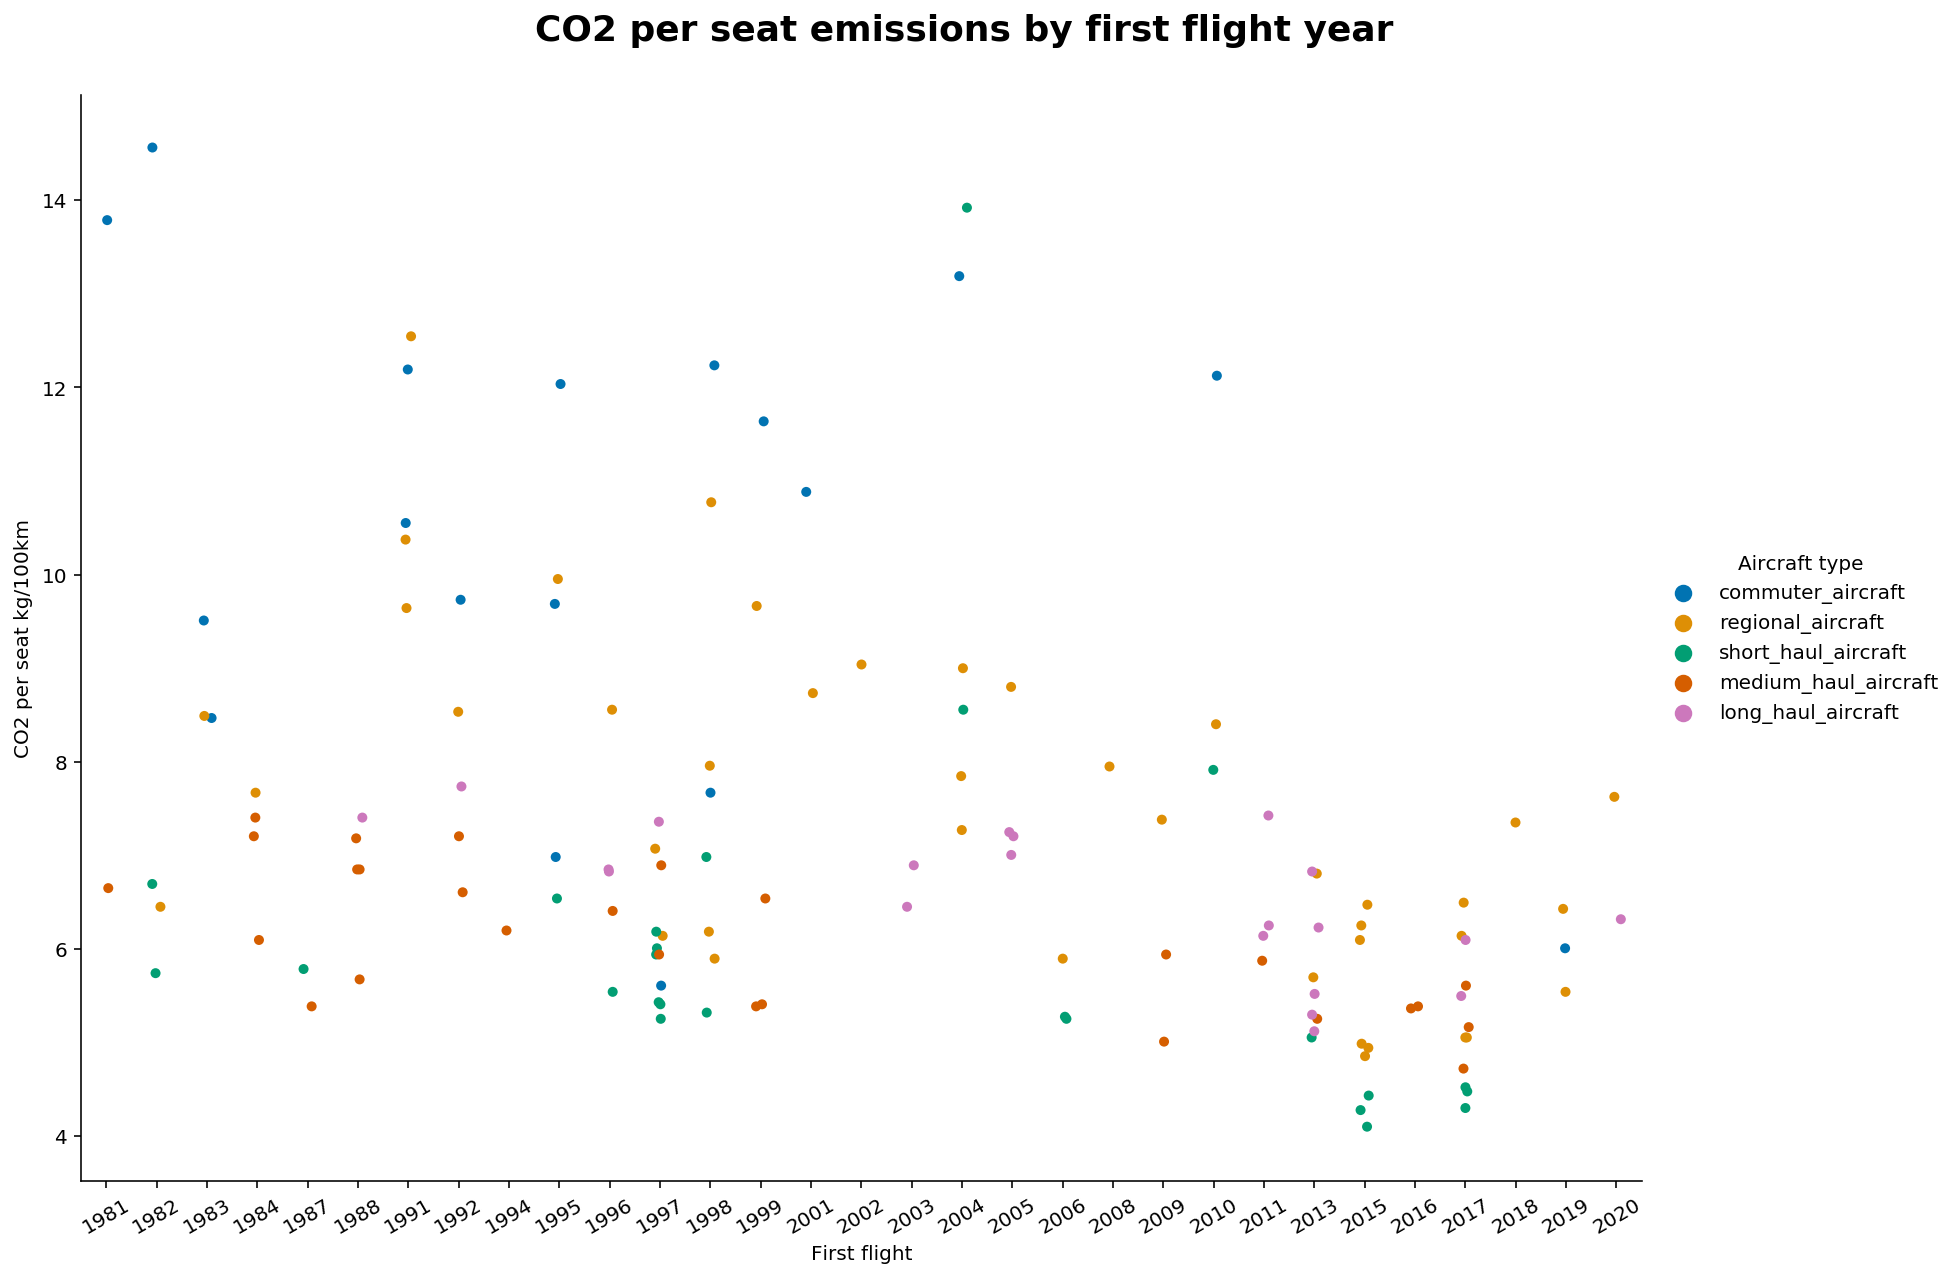

In [10]:
%config InlineBackend.figure_format ='retina'

#fig, ax = pyplot.subplots()
# the size of A4 paper
#fig.set_size_inches(17.7, 8.27)
g = sns.catplot(height=8.27, aspect=11.7/8.27, x="First flight", y="CO2 per seat kg/100km", data=all_aircraft, hue='Aircraft type', palette="colorblind")
g.set_xticklabels(rotation=30)
g.fig.suptitle('CO2 per seat emissions by first flight year' ,position=(0.5,1.05), fontweight='bold', size=18)

Ok this is reasuring. Planes are becomming more fuel efficient. Let's look at the trends.

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [12]:
def linear_regression_of_co2_per_seat(data: pd.DataFrame):
    X = data["First flight"].apply(lambda x: int(x))
    y = data["CO2 per seat kg/100km"]

    X = X.values
    y = y.values
    X = X.reshape((len(X),1))
    y = y.reshape((len(y),1))

    lr = LinearRegression().fit(X,y)
    print("slope of regression : " + str(lr.coef_[0][0]))

    X_test = np.arange(1980,2021).reshape((41,1))
    plt.scatter(X, y, color = "red")
    plt.plot(X_test, lr.predict(X_test), color = "green")
    plt.title("Aircraft CO2 per seat by different type of aircraft")
    plt.xlabel("First flight")
    plt.ylabel("CO2 per seat kg/100km")
    plt.show()

slope of regression : -0.07913092776942787


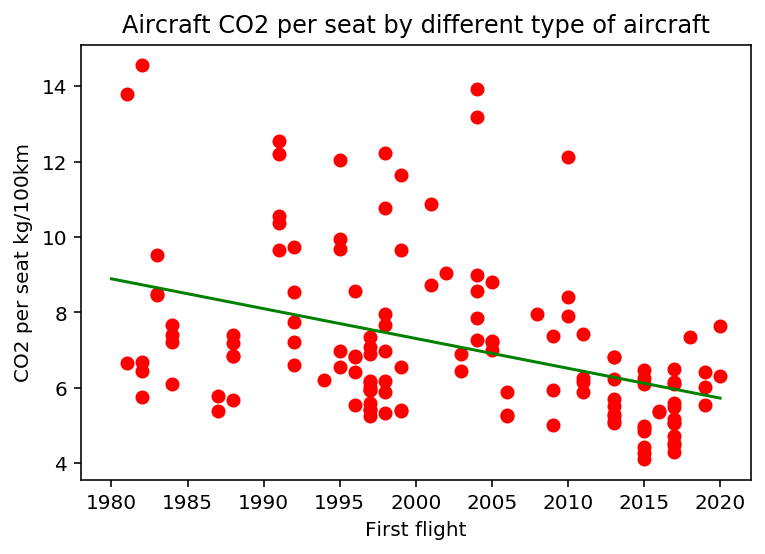

In [13]:
linear_regression_of_co2_per_seat(all_aircraft)

This is impressive. With the data that we collected it appears that the $CO_2$ emmisions have been decreasing of 7.9% each year. This is great progress.

commuter_aircraft
slope of regression : -0.08017627449669856


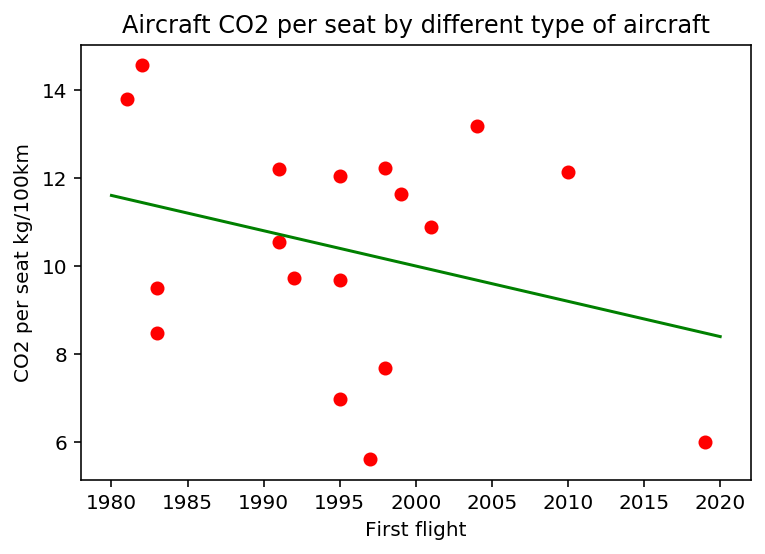

regional_aircraft
slope of regression : -0.09454463782309695


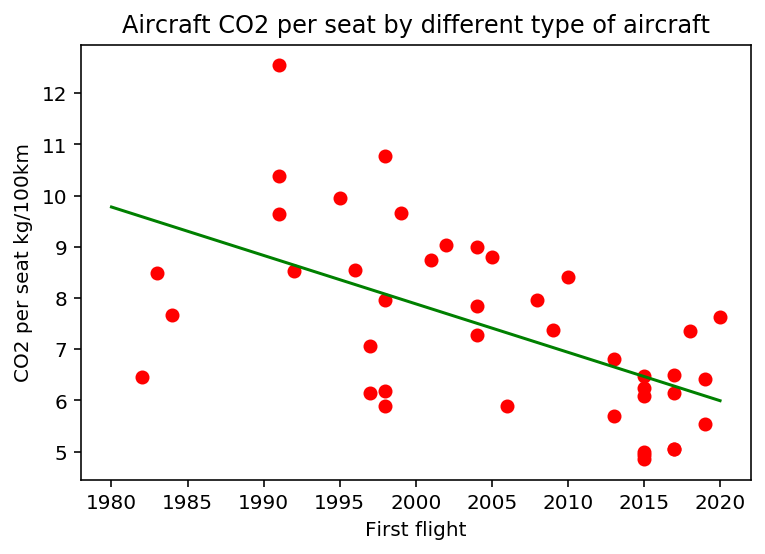

short_haul_aircraft
slope of regression : -0.04318612686470605


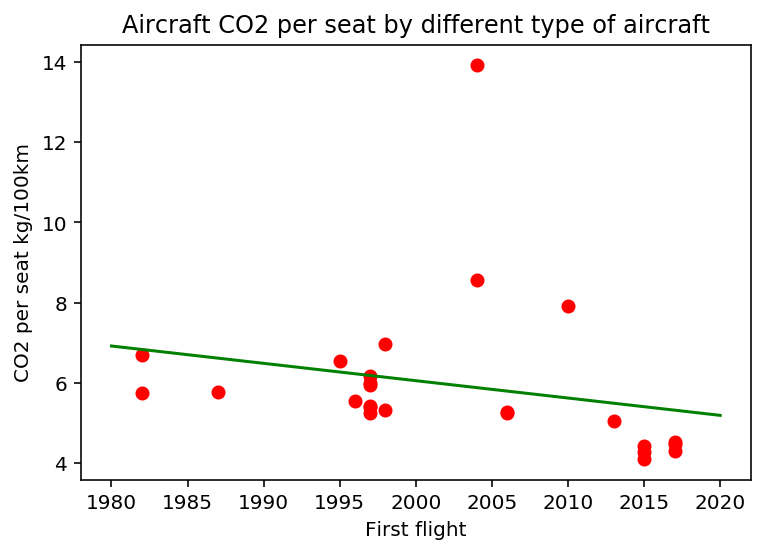

medium_haul_aircraft
slope of regression : -0.046066174618046865


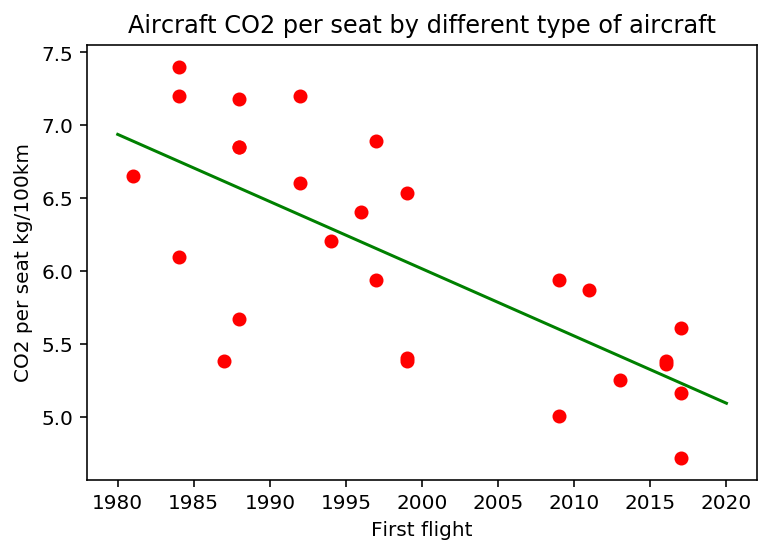

long_haul_aircraft
slope of regression : -0.05929134066881299


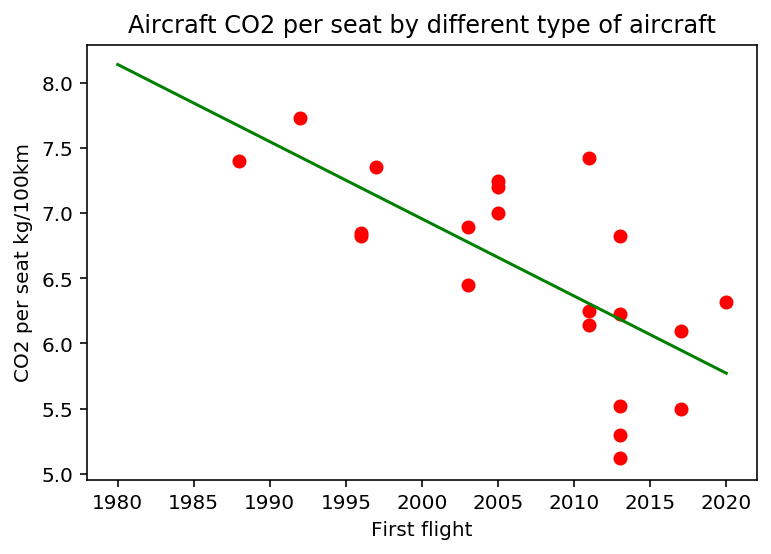

In [14]:
for a in aircraft_data:
    print(a[1])
    linear_regression_of_co2_per_seat(a[0])

# CO2 kg/km emission per sector size 

First, let's plot the mean CO2 emissions (kg/km) according to the sector size

In [15]:
co2_by_sector_size = all_aircraft.groupby("Sector km").mean().reset_index()[["Sector km", "CO2 kg/km"]]

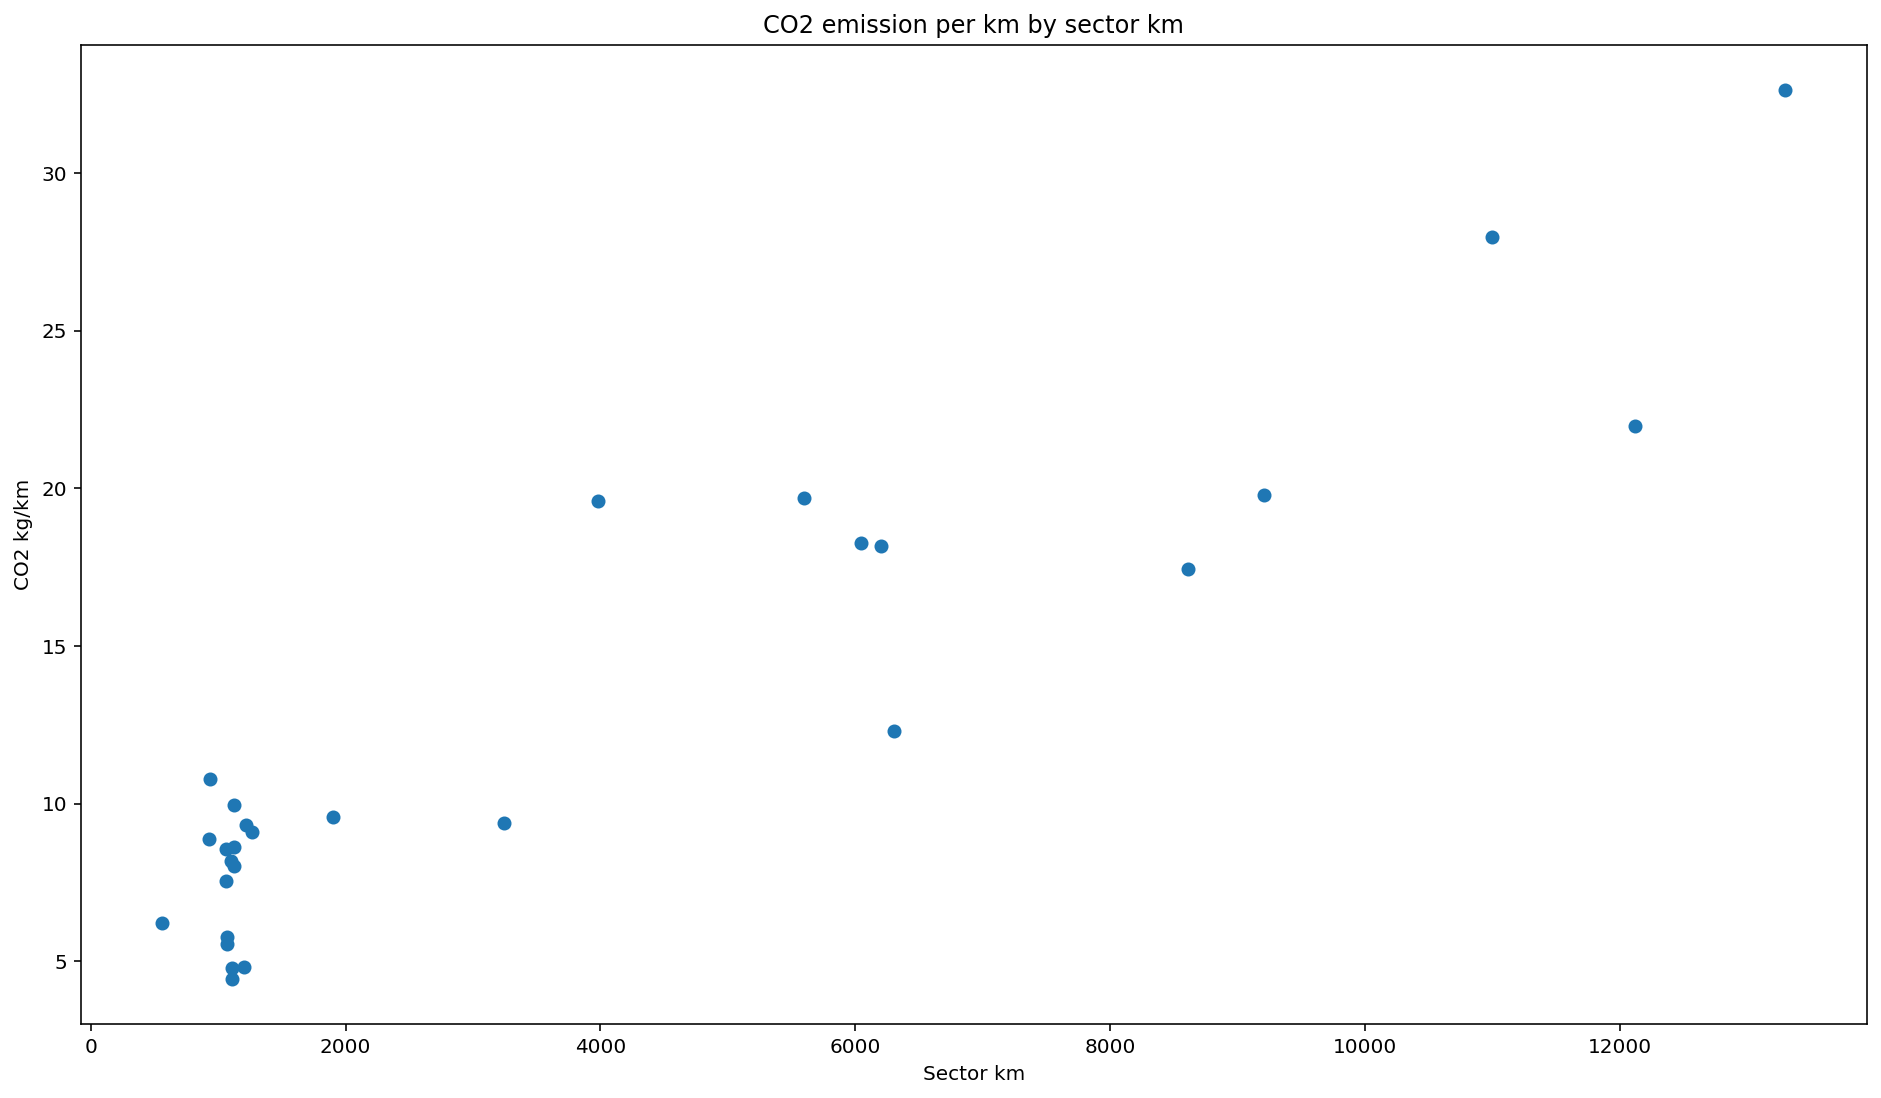

In [16]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(co2_by_sector_size["Sector km"], co2_by_sector_size["CO2 kg/km"])
plt.xlabel("Sector km")
plt.ylabel("CO2 kg/km")
plt.title("CO2 emission per km by sector km")
plt.show()

It seems that the bigger the sector size is, the bigger the CO2 emissions by km are. But let's see:

In [17]:
seats_by_sector = all_aircraft.groupby("Sector km").mean().reset_index()[["Sector km", "Seats"]]

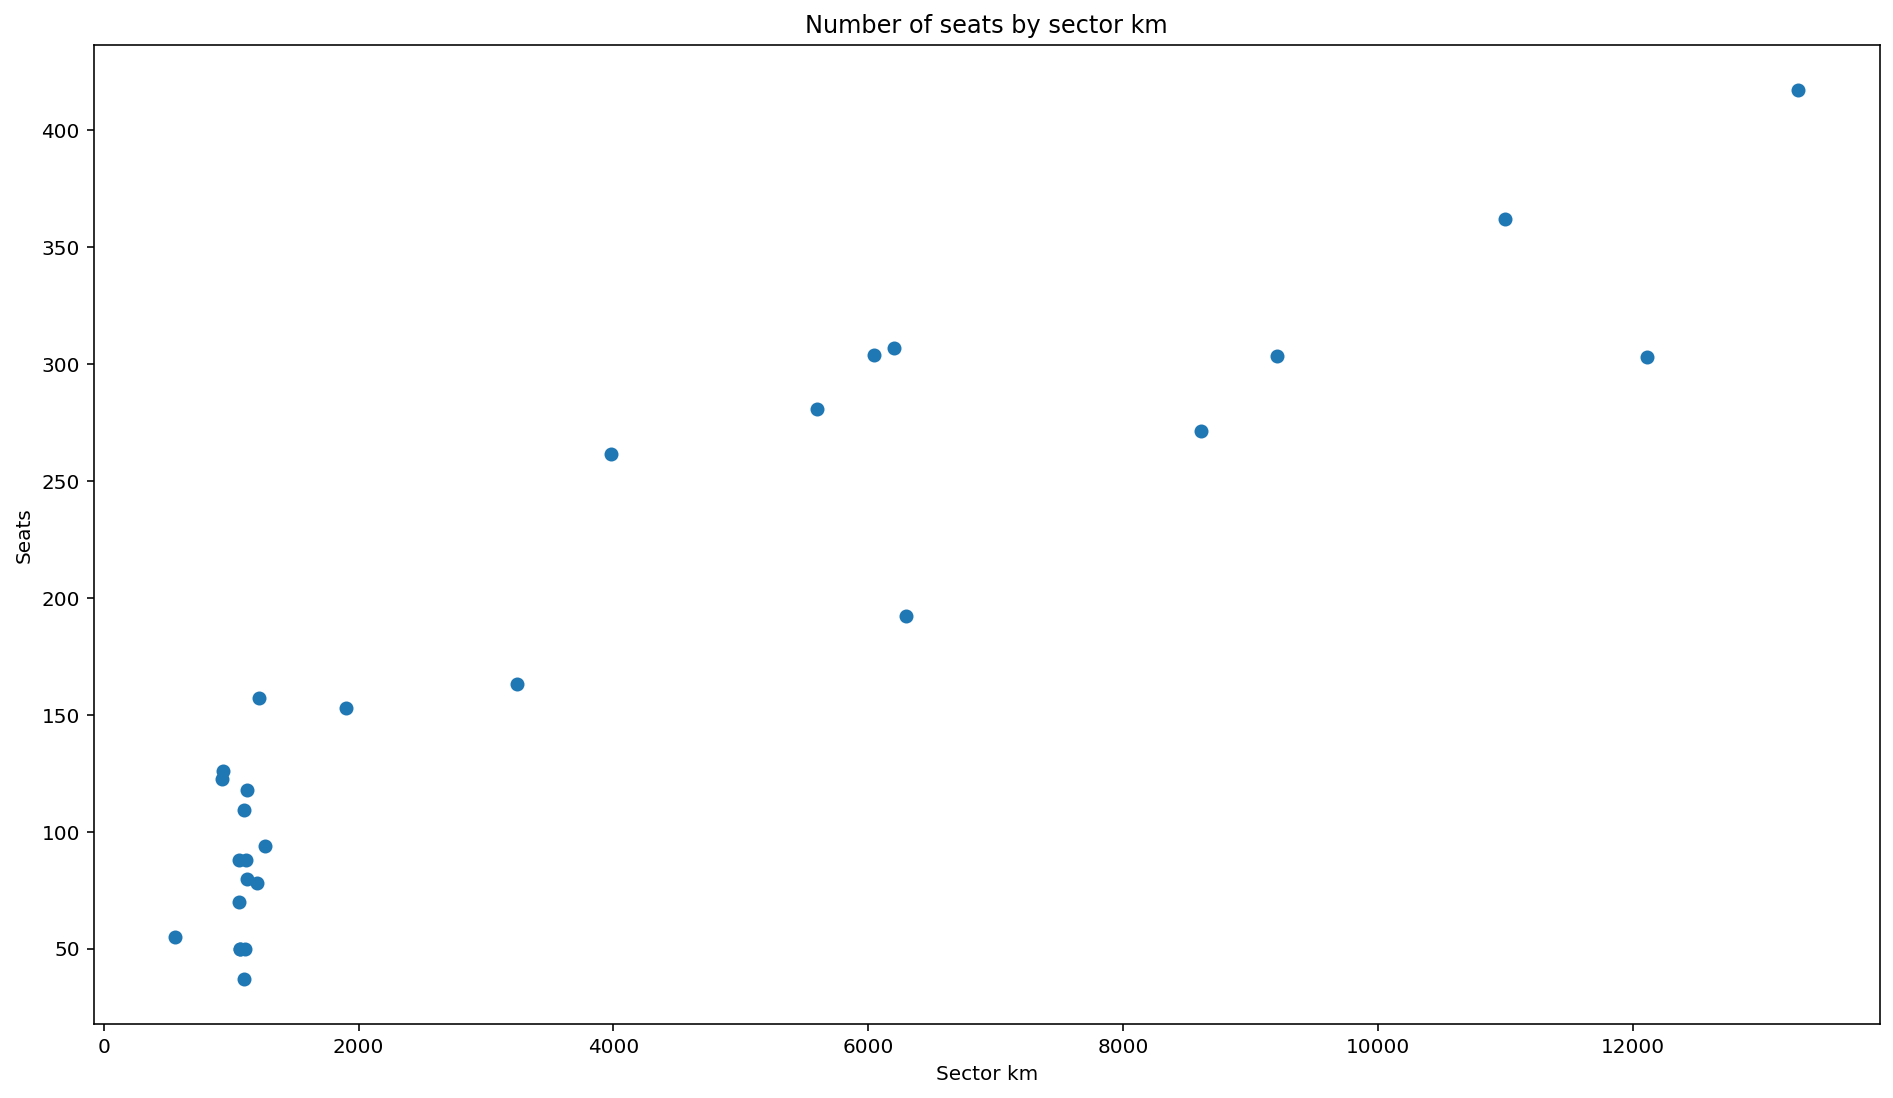

In [18]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(seats_by_sector["Sector km"], seats_by_sector["Seats"])
plt.title("Number of seats by sector km")
plt.xlabel("Sector km")
plt.ylabel("Seats")
plt.show()

Indeed, the bigger the distance is, the more seats the plane has. It would then be more interesting to plot the CO2 emissions relatively to the number of seats. 

In [19]:
co2_by_seat = all_aircraft.groupby("Sector km").mean().reset_index()[["Sector km", "CO2 per seat kg/100km"]]

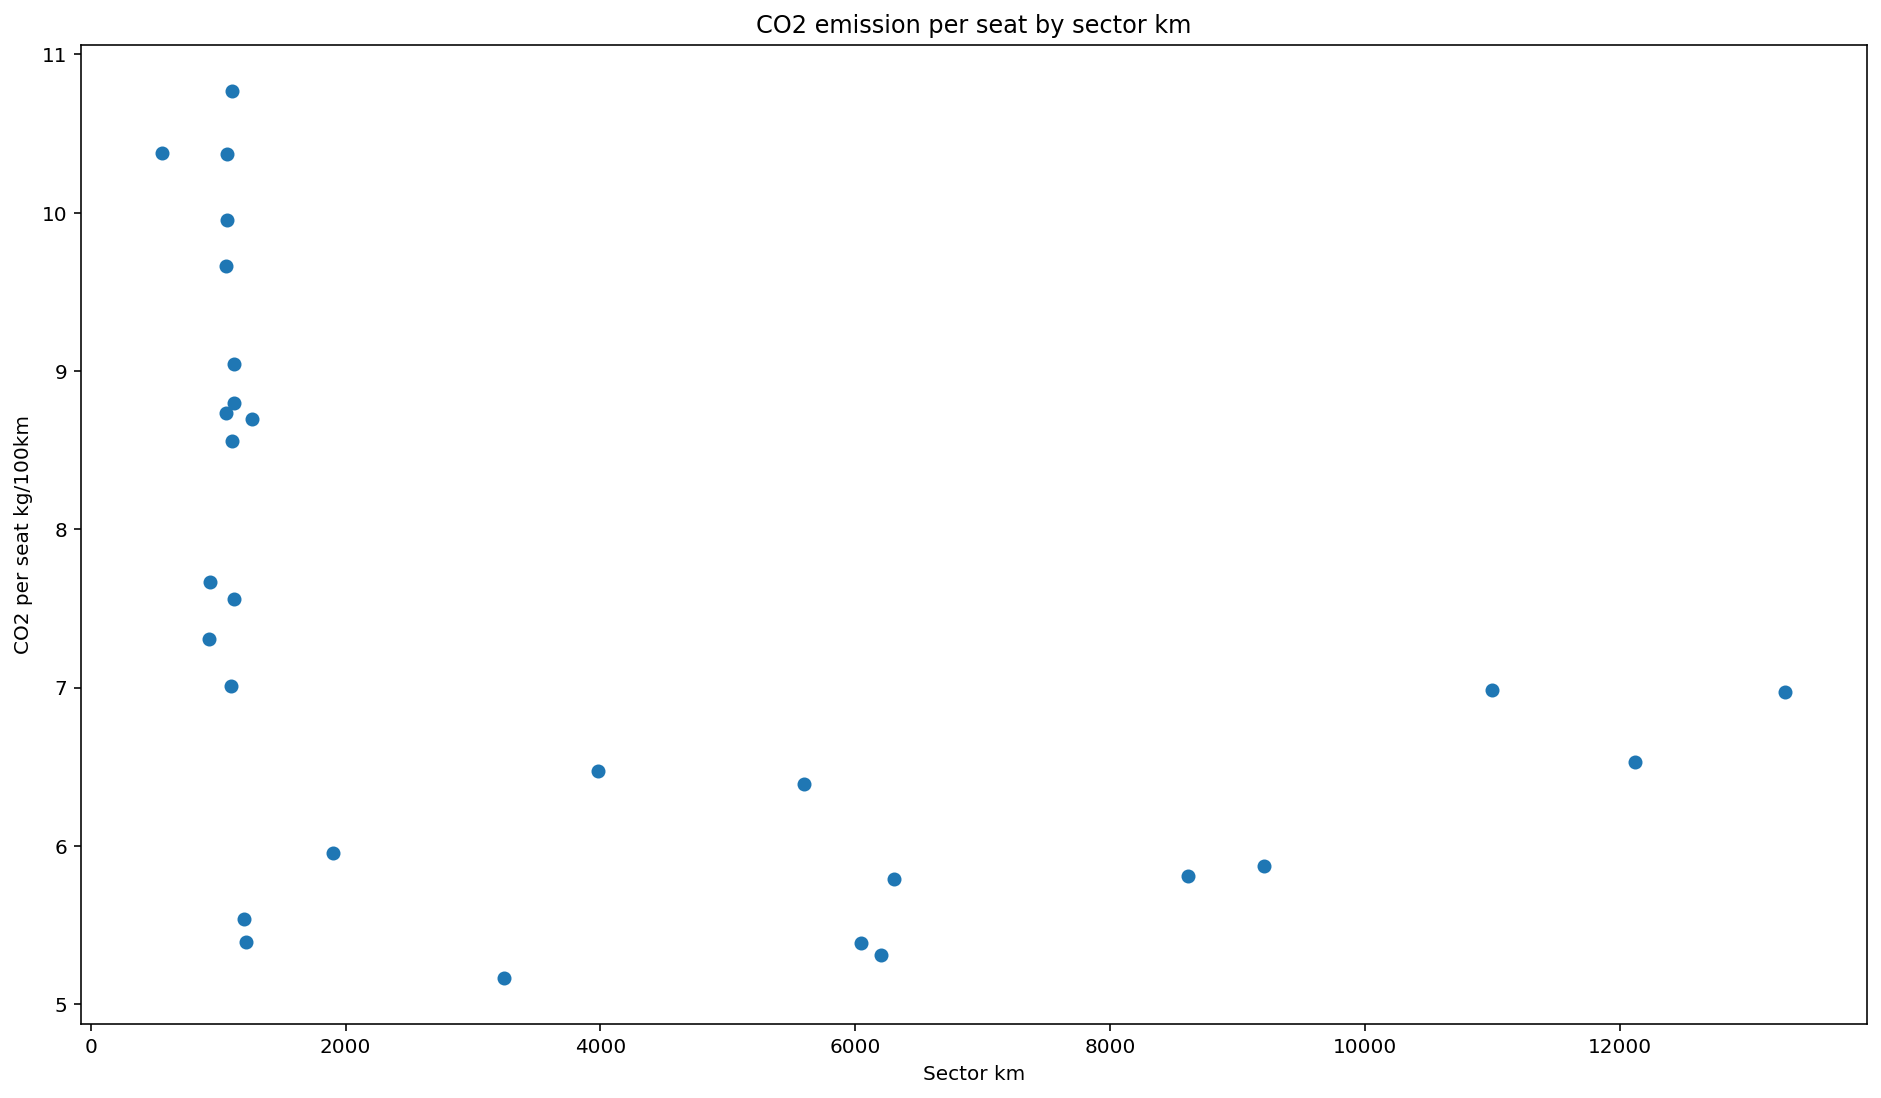

In [20]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(co2_by_seat["Sector km"], co2_by_seat["CO2 per seat kg/100km"])
plt.title("CO2 emission per seat by sector km")
plt.xlabel("Sector km")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

In [21]:
regional_co2_seat = regional_aircraft.groupby("Sector km").mean().reset_index()

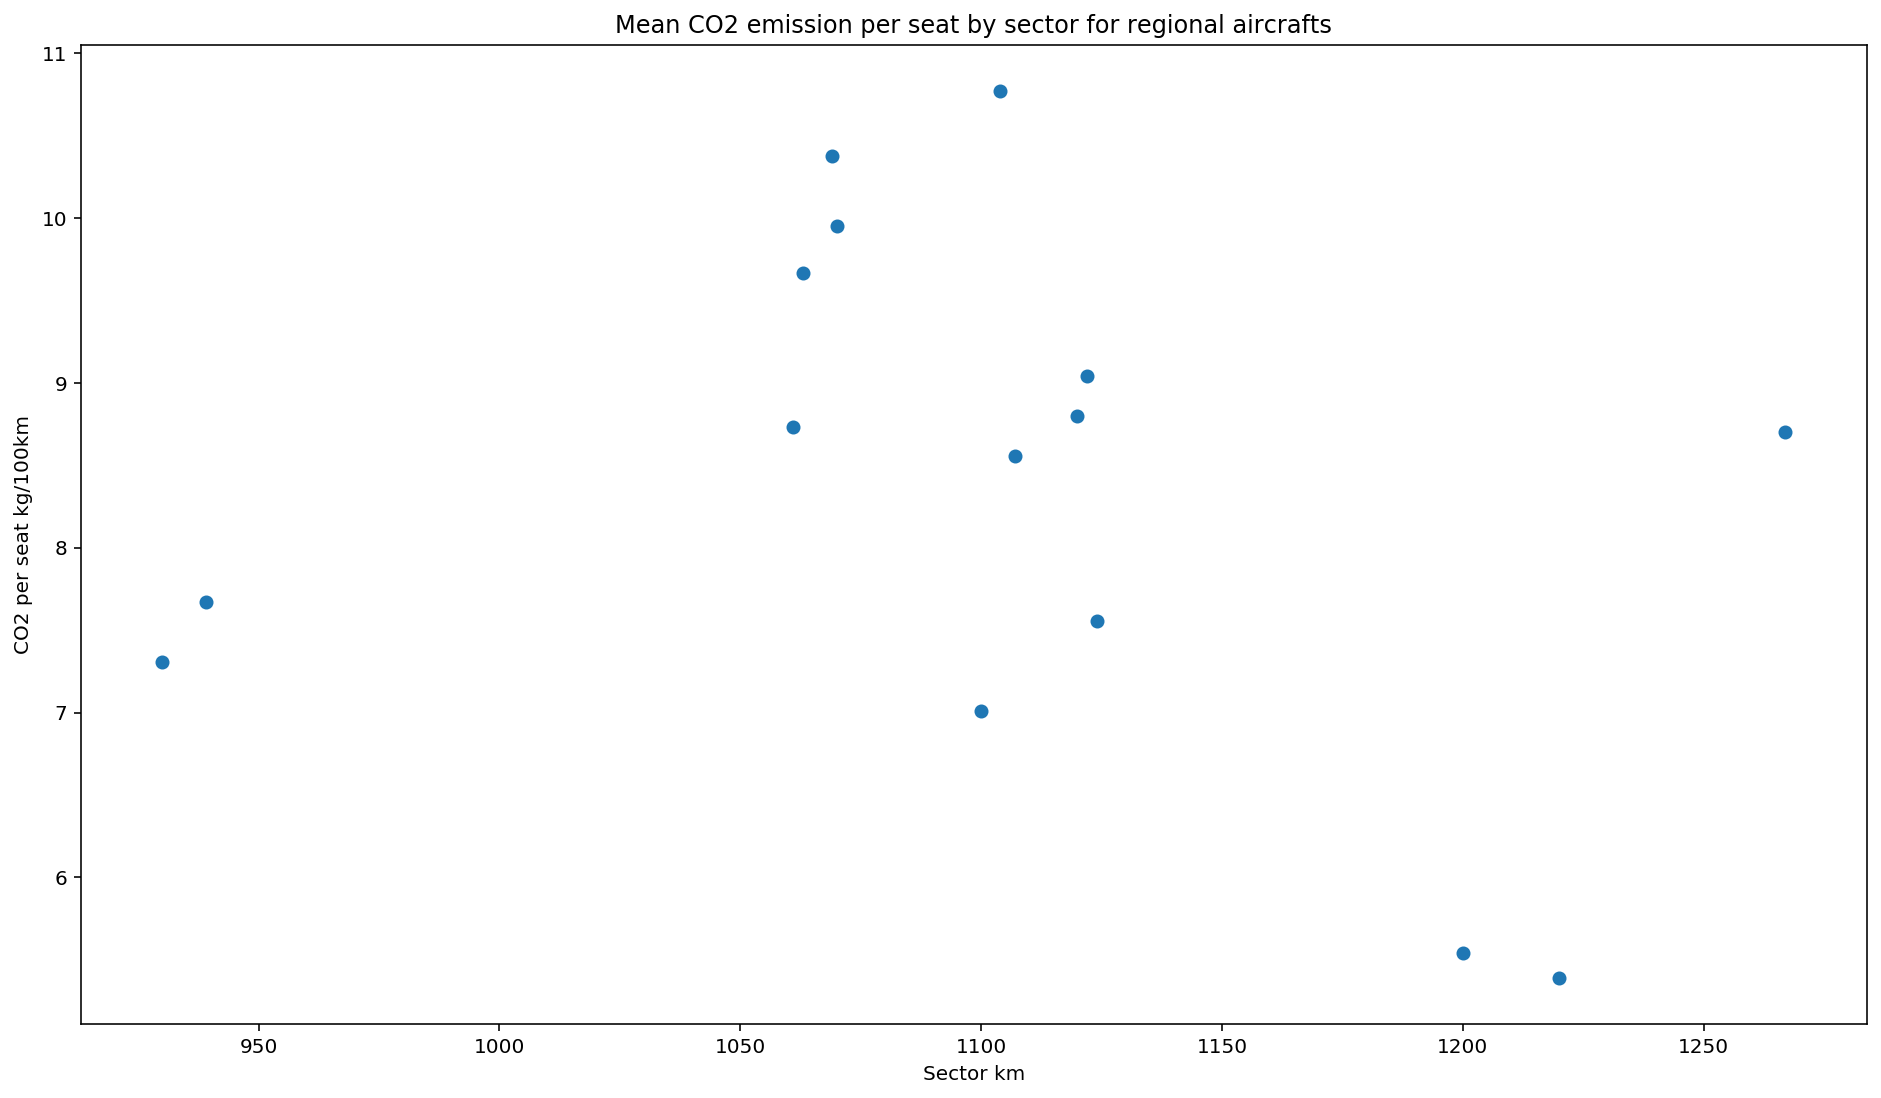

In [22]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(regional_co2_seat["Sector km"], regional_co2_seat["CO2 per seat kg/100km"])
plt.title("Mean CO2 emission per seat by sector for regional aircrafts")
plt.xlabel("Sector km")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

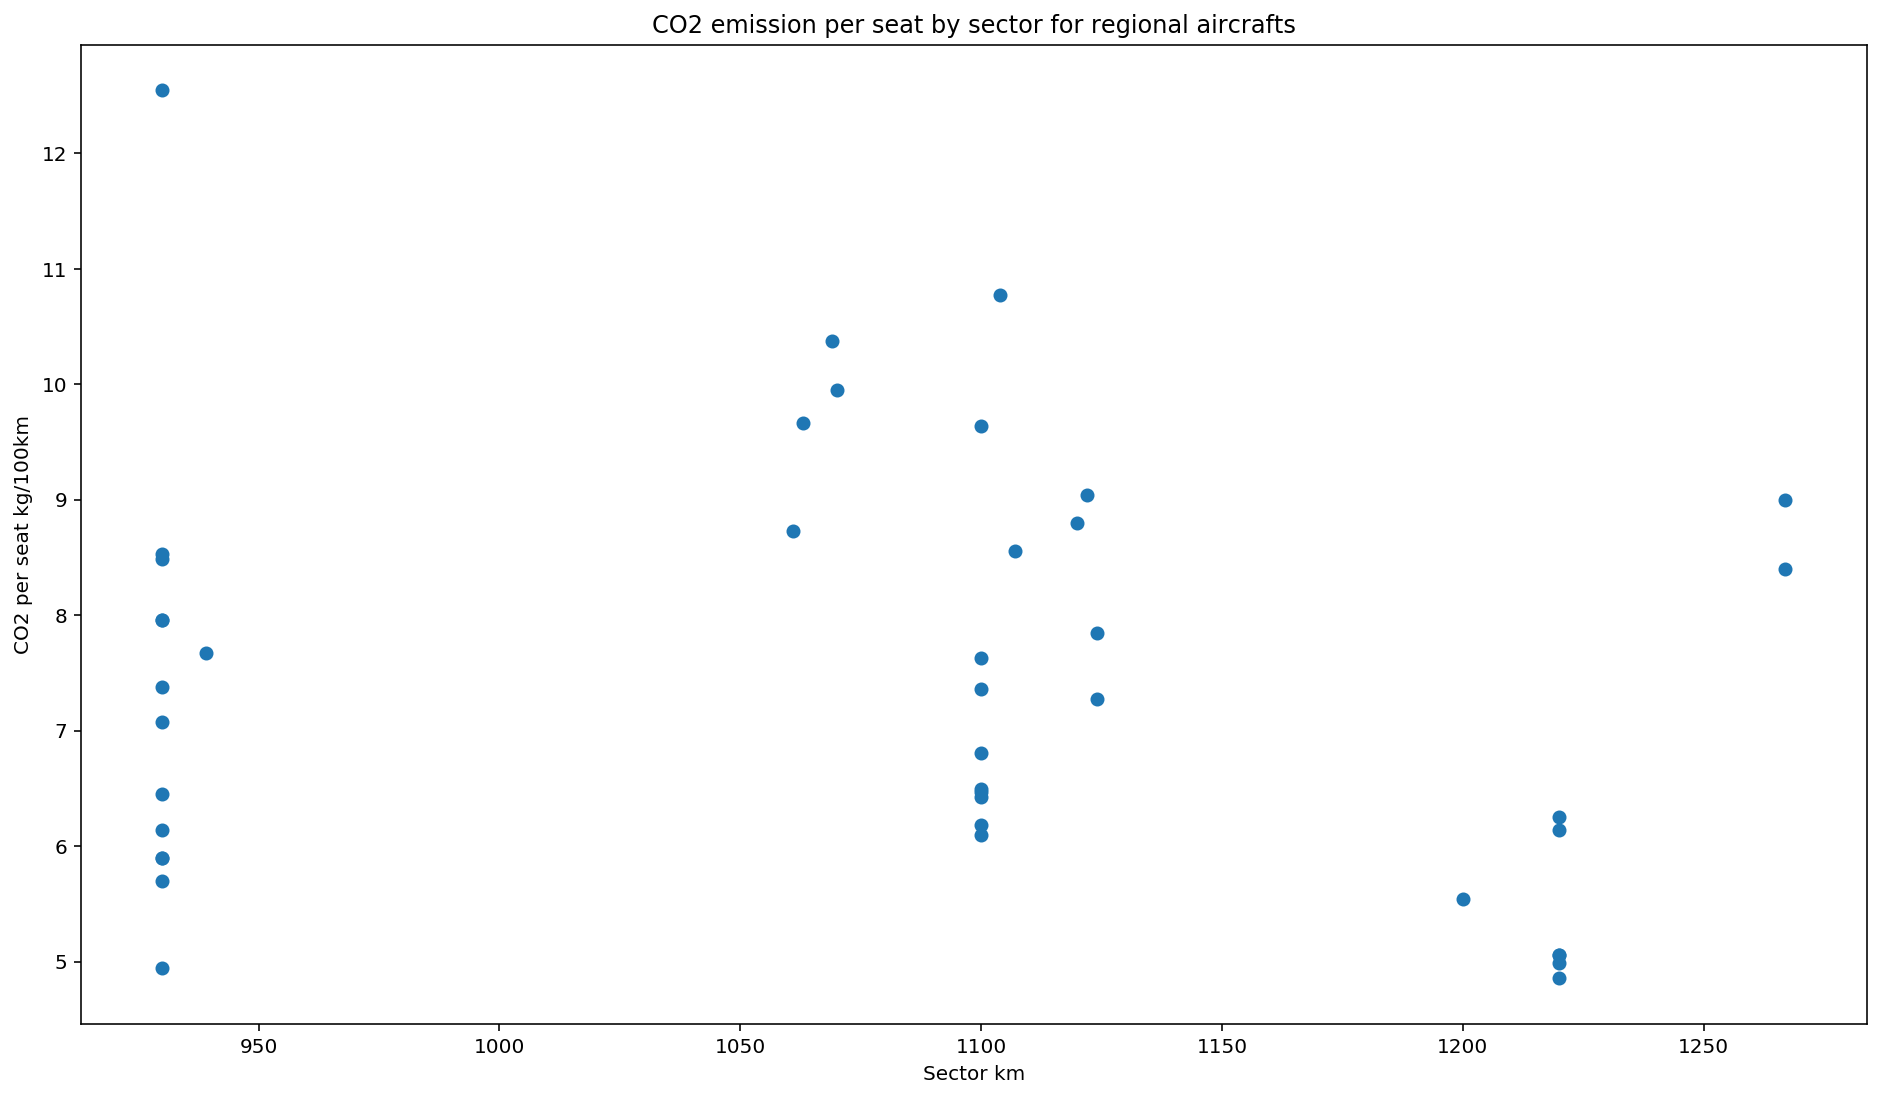

In [23]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(regional_aircraft["Sector km"], regional_aircraft["CO2 per seat kg/100km"])
plt.title("CO2 emission per seat by sector for regional aircrafts")
plt.xlabel("Sector km")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

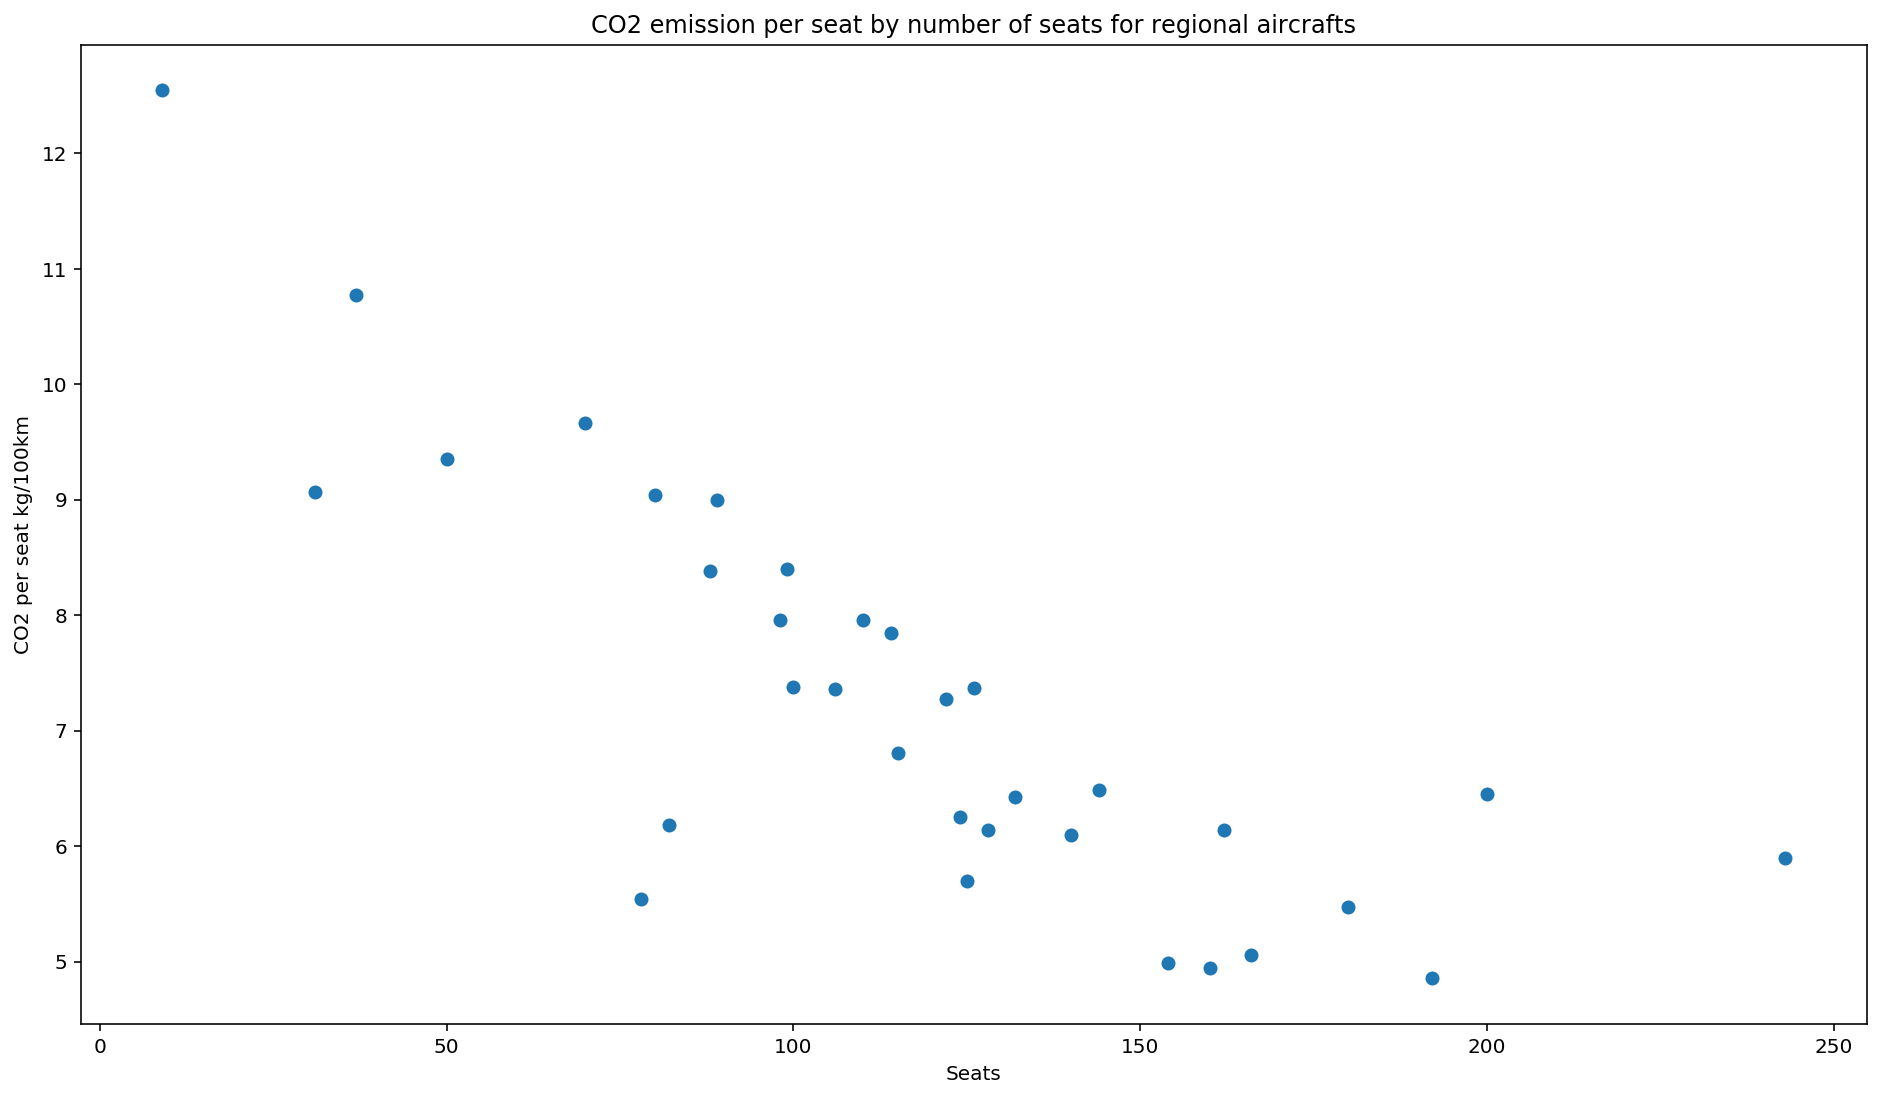

In [24]:
regional_seats = regional_aircraft.groupby("Seats").mean().reset_index()
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(regional_seats["Seats"], regional_seats["CO2 per seat kg/100km"])
plt.title("CO2 emission per seat by number of seats for regional aircrafts")
plt.xlabel("Seats")
plt.ylabel("CO2 per seat kg/100km")
plt.show()

In [26]:
aircraft_sorted_by_seats = all_aircraft.sort_values("Seats")

In [27]:
import plotly.express as px
fig = px.scatter(
    data_frame=aircraft_sorted_by_seats,
    x="Seats",
    y='CO2 per seat kg/100km',
    color='Aircraft type', hover_name="Model")
fig.show()

In [28]:
aircraft_sorted_by_seats

Model  Seats  First flight  Fuel burn kg/km  \
24               Quest Kodiak      9          2004             0.71   
37              Pilatus PC-12      9          1991             0.41   
4   Beechcraft 1900D (226 nm)     19          1982             1.00   
10                Dornier 228     19          1981             0.94   
12           Embraer Brasilia     30          1983             0.92   
..                        ...    ...           ...              ...   
8              Boeing 747-400    416          1988            10.77   
9                Boeing 747-8    467          2011            10.54   
9                Boeing 747-8    467          2011             9.90   
6                 Airbus A380    525          2005            13.78   
7                 Airbus A380    544          2005            13.78   

    Fuel per seat L/100km  Sector km  CO2 per seat kg/100km  CO2 kg/km  \
24                   6.28     1900.0              13.919406    2.19106   
37                   5.66      930.0              12.545198    1.26526   
4                    6.57      560.0              14.562182    3.08600   
10                   6.22      560.0              13.786419    2.90084   
12                   3.82      560.0               8.466900    2.83912   
..                    ...        ...                    ...        ...   
8                    3.24     3984.0               7.181350   33.23622   
9                    2.82    11000.0               6.250434   32.52644   
9                    2.65     5600.0               5.873635   30.55140   
6                    3.27    13300.0               7.247844   42.52508   
7                    3.16    11000.0               7.004033   42.52508   

           Aircraft type  
24   short_haul_aircraft  
37     regional_aircraft  
4      commuter_aircraft  
10     commuter_aircraft  
12     commuter_aircraft  
..                   ...  
8   medium_haul_aircraft  
9     long_haul_aircraft  
9   medium_haul_aircraft  
6     long_haul_aircraft  
7     long_haul_aircraft  

[133 rows x 9 columns]

In [29]:
#Jeremy methods

def build_poly(x, degree):
    return np.vander(x,N=degree+1, increasing=True)

def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.solve(tx.T@tx, tx.T@y)
    loss = compute_loss(y,tx,w)
    return loss, w

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx@w
    return 1/(2*y.shape[0])*e.T@e

def compute_mse(y, tx, w):
    e = y - tx@w
    return 1/(2*y.shape[0])*e.T@e

def plot_fitted_curve(y, x, weights, degree, ax):
    """plot the fitted curve."""
    ax.scatter(x, y, color='b', s=12, facecolors='none', edgecolors='r')
    xvals = np.arange(min(x) - 0.1, max(x) + 0.1, 0.1)
    tx = build_poly(xvals, degree)
    f = tx.dot(weights)
    ax.plot(xvals, f)
    ax.set_xlabel("Seats")
    ax.set_ylabel("CO2 per seat kg/100km")
    ax.set_title("Polynomial degree " + str(degree))
    

<class 'numpy.ndarray'>
1.130245517595007


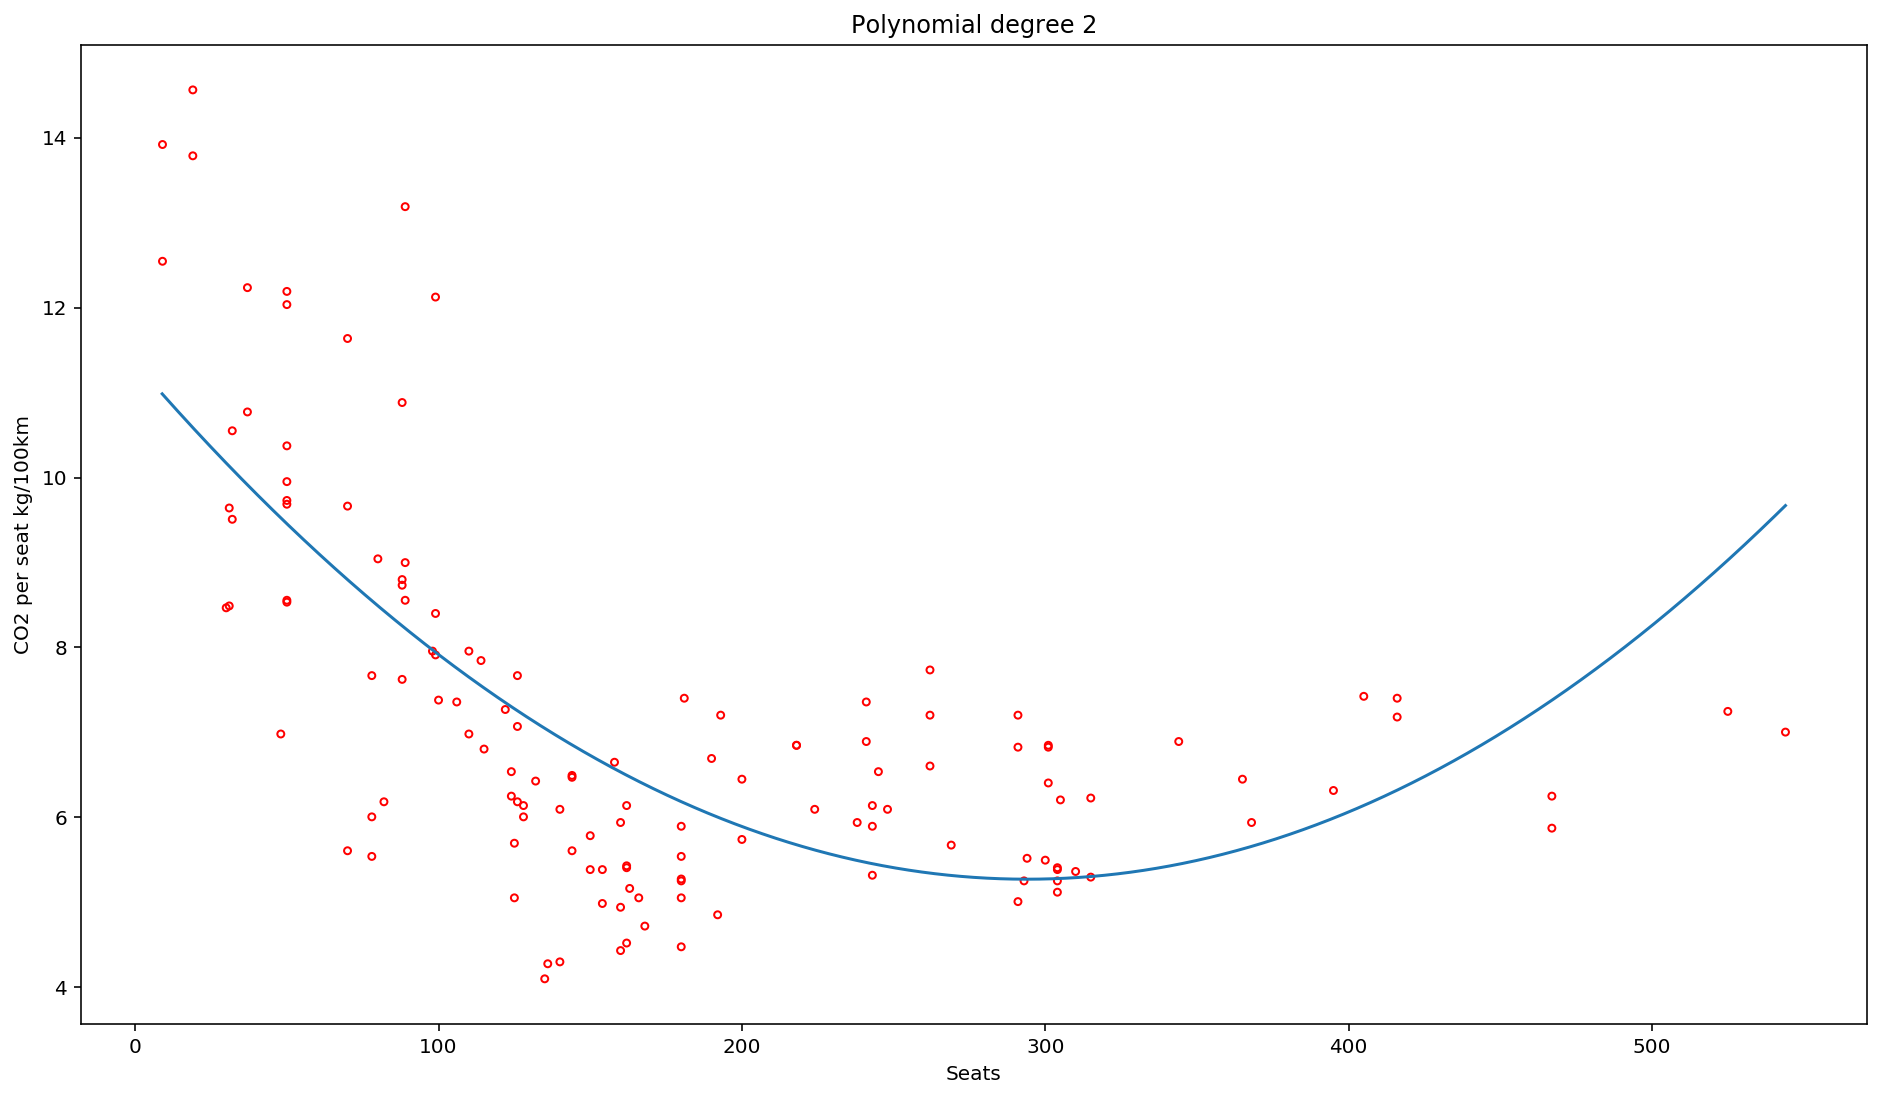

In [30]:
x = aircraft_sorted_by_seats["Seats"].values
degree = 2
y = aircraft_sorted_by_seats["CO2 per seat kg/100km"]

m = build_poly(x, degree)
print(type(m))
loss, weights = least_squares(y,m)
rmse = np.sqrt(2*compute_mse(y,m,weights))
print(loss)

# plot fit
fig, axs = plt.subplots(figsize=(16, 9))
plot_fitted_curve(y, x, weights, degree, axs)

In [31]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*x**2 + b*x + c

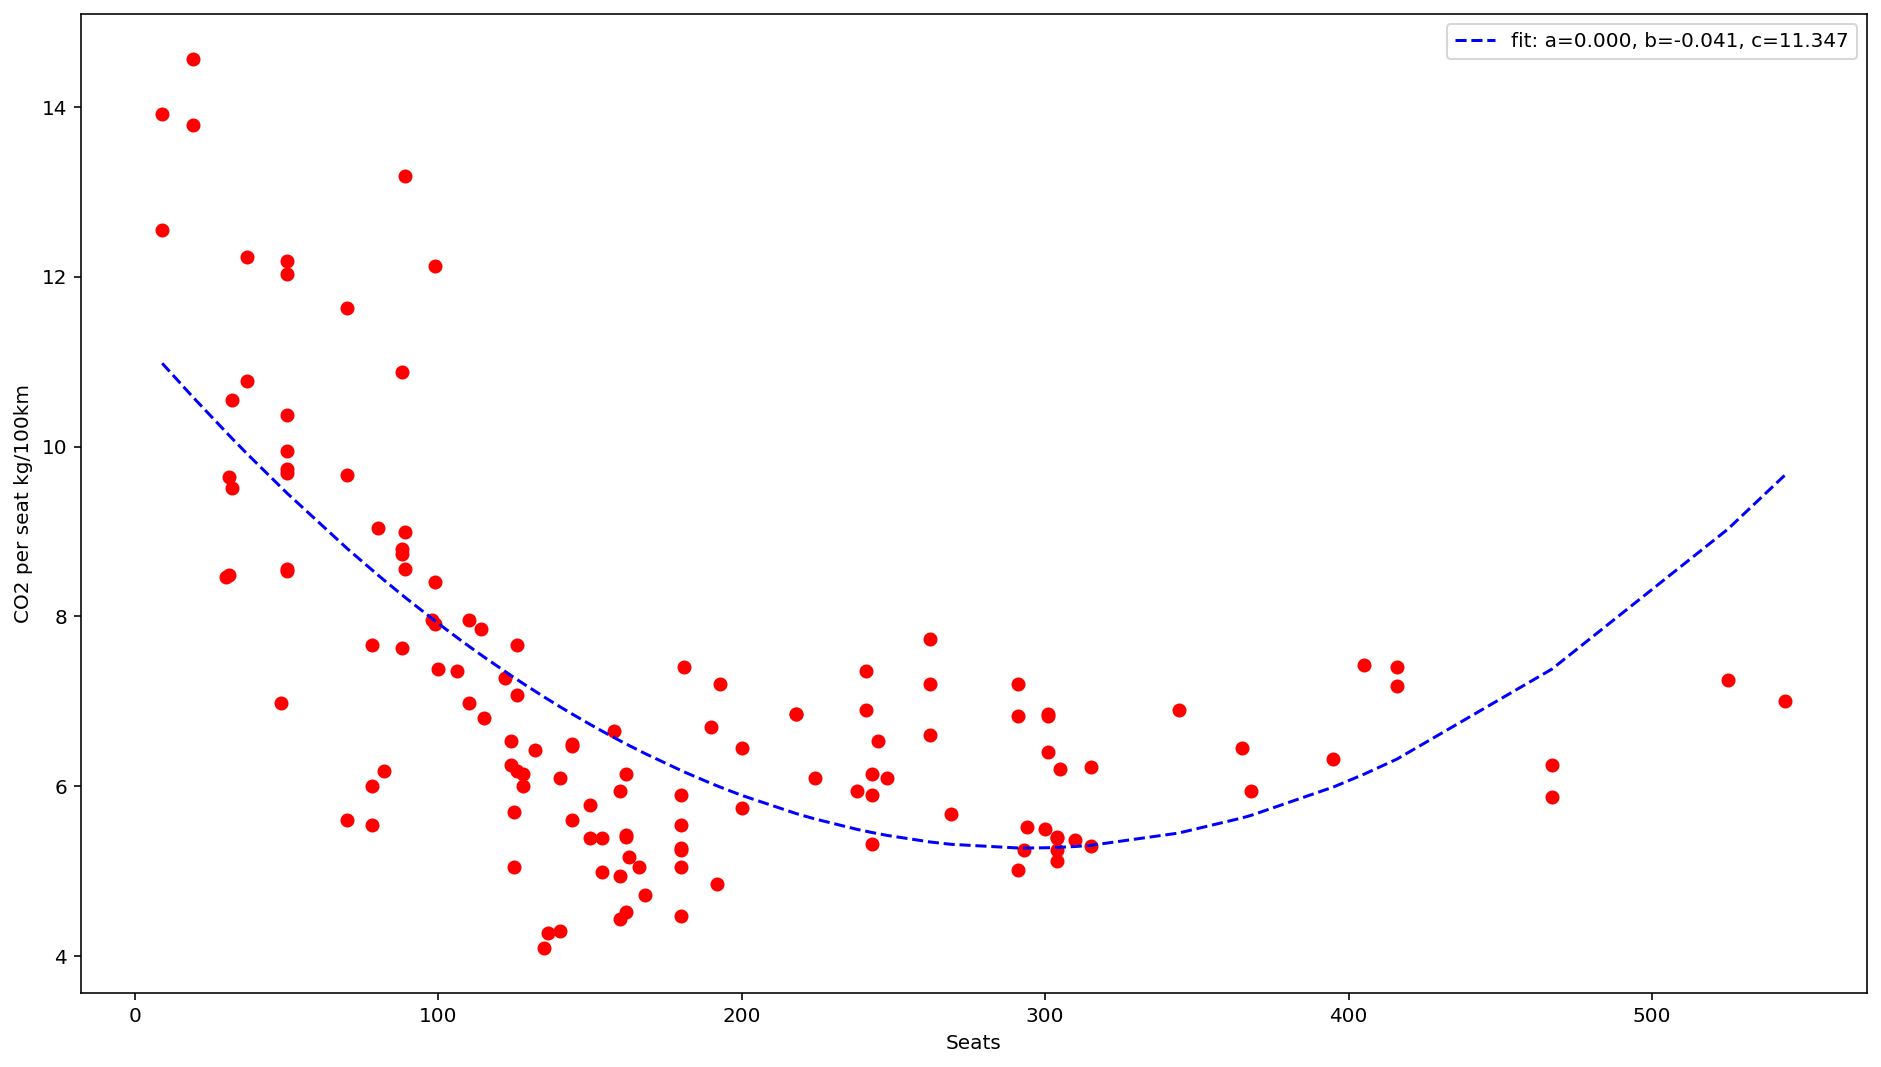

In [32]:
# Andrea's DH method
fig, axs = plt.subplots(figsize=(16, 9))
plt.scatter(aircraft_sorted_by_seats['Seats'], aircraft_sorted_by_seats['CO2 per seat kg/100km'], color = 'red')

popt, pcov = curve_fit(func, aircraft_sorted_by_seats['Seats'], aircraft_sorted_by_seats['CO2 per seat kg/100km'])

plt.plot(aircraft_sorted_by_seats['Seats'], func(aircraft_sorted_by_seats['Seats'], *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color = "blue")
plt.xlabel('Seats')
plt.ylabel('CO2 per seat kg/100km')
plt.legend()
plt.show()

In [33]:
import pandas as pd
import os
from all_aircrafts import all_aircrafts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

import plotly.express as px
import plotly.figure_factory as ff

## Planespotter data

After analysing the task at hand of identifying if some airlines are better to fly with than other we decided that we needed to get our hands on the fleets of each airline. To do that we contacted planespotter.net

In [35]:
path = os.path.join(".", "data", "planespotter", "2019-11-12 prodlist.xlsx")
planespotter_aircrafts = pd.read_excel(path)

In [36]:
planespotter_aircrafts.head()

Aircraft Manufacturer  Aircraft Type                       Operator  \
0                Airbus  Airbus A300B1               Airbus Industrie   
1                Airbus  Airbus A300B1  TEA - Trans European Airlines   
2                Airbus  Airbus A300B2                   SA Novespace   
3                Airbus  Airbus A300B2                      Air Inter   
4                Airbus  Airbus A300B2                     Air France   

   Operator ID Operator Category Operator Country Operator Parent/Group  \
0         1336      Manufacturer           France                   NaN   
1          294           Airline          Belgium                   NaN   
2         7216             Other           France                   NaN   
3         1309           Airline           France                   NaN   
4         1306           Airline           France        Air France-KLM   

   Parent/Group ID Parent/Group Country                 First Operator  ...  \
0              NaN                  NaN                            NaN  ...   
1              NaN                  NaN  TEA - Trans European Airlines  ...   
2              NaN                  NaN                   SA Novespace  ...   
3              NaN                  NaN                      Air Inter  ...   
4          11321.0               France                     Air France  ...   

   Build Country First Customer Delivery Date Delivery Date Operator  \
0         France                          NaN             1972-01-01   
1         France                   1974-11-01             1974-11-01   
2         France                   2005-01-01             2005-01-01   
3         France                   1977-01-01             1977-01-01   
4         France                   1974-05-01             1974-05-01   

  Exit Date Operator Nr. of Engines Engine Manufacturer Engine Type  \
0                NaN              2    General Electric      CF6-50   
1                NaN              2    General Electric      CF6-50   
2                NaN              2    General Electric      CF6-50   
3                NaN              2    General Electric      CF6-50   
4                NaN              2    General Electric      CF6-50   

  Config (Pax/Combi/Cargo/Other) Seat Total  Age (Years)  
0                          Other          0          1.7  
1                            NaN          0         30.4  
2                            NaN          0         46.4  
3                            NaN          0         19.4  
4                            NaN          0         23.1  

[5 rows x 25 columns]

In [37]:
planespotter_aircrafts_dictionnary = planespotter_aircrafts.groupby("Aircraft Type").count()
planespotter_aircrafts_dictionnary = planespotter_aircrafts_dictionnary.reset_index()
planespotter_aircrafts_dictionnary["Wiki name"] = planespotter_aircrafts_dictionnary["Aircraft Type"]
planespotter_aircrafts_dictionnary = planespotter_aircrafts_dictionnary[["Aircraft Type", "Wiki name"]]
planespotter_aircrafts_dictionnary = planespotter_aircrafts_dictionnary.rename(columns={"Aircraft Type": "Planespotter name"})
planespotter_aircrafts_dictionnary.head()

Planespotter name        Wiki name
0            ATR 42           ATR 42
1            ATR 72           ATR 72
2   Airbus A220-100  Airbus A220-100
3   Airbus A220-300  Airbus A220-300
4   Airbus A300-600  Airbus A300-600

In [38]:
all_aircrafts = all_aircrafts.reset_index()
all_aircrafts = all_aircrafts.drop('index', axis=1)
all_aircrafts

Model  Seats  First flight  Fuel burn kg/km  \
0     Antonov An-148 (241 nmi)     89          2004             4.23   
1     Antonov An-158 (241 nmi)     99          2010             4.34   
2                   ATR 42-500     48          1995             1.26   
3                   ATR 72-500     70          1997             1.42   
4    Beechcraft 1900D (226 nm)     19          1982             1.00   
..                         ...    ...           ...              ...   
128              Boeing 777-9X    395          2020             9.04   
129               Boeing 787-8    243          2011             5.38   
130               Boeing 787-9    294          2013             5.85   
131               Boeing 787-9    304          2013             5.63   
132               Boeing 787-9    291          2013             7.18   

     Fuel per seat L/100km  Sector km  CO2 per seat kg/100km  CO2 kg/km  \
0                     5.95      560.0              13.187973   13.05378   
1                     5.47      560.0              12.124069   13.39324   
2                     3.15      560.0               6.981868    3.88836   
3                     2.53      560.0               5.607659    4.38212   
4                     6.57      560.0              14.562182    3.08600   
..                     ...        ...                    ...        ...   
128                   2.85    13300.0               6.316928   27.89744   
129                   2.77     8610.0               6.139611   16.60268   
130                   2.49     8610.0               5.519000   18.05310   
131                   2.31     9208.0               5.120036   17.37418   
132                   3.08    12116.0               6.826715   22.15748   

          Aircraft type  
0     commuter_aircraft  
1     commuter_aircraft  
2     commuter_aircraft  
3     commuter_aircraft  
4     commuter_aircraft  
..                  ...  
128  long_haul_aircraft  
129  long_haul_aircraft  
130  long_haul_aircraft  
131  long_haul_aircraft  
132  long_haul_aircraft  

[133 rows x 9 columns]

# Export data

In [39]:
wiki_aircrafts_names = all_aircrafts.Model.unique()
wiki_aircrafts_names.sort()
path = os.path.join(".", "data", "wikipedia", "wiki_aircrafts_names.csv")
pd.Series(wiki_aircrafts_names).to_csv(path, header=True)

In [40]:
path = os.path.join(".", "data", "planespotter", "planespotter_aircratfs_dictionnary.csv")
planespotter_aircrafts_dictionnary.to_csv(path)

We will now nanualy go and create the dataset that matches planespotters aicraft model names to the names of the wikipedia aircrafts. It is not worth automating this step since the dataset that we need to produce is not that large. Doing it by hand also allows use to ensure that there is no mistakes in the pairing.

# Import data once manually updated

In [41]:
path = os.path.join(".", "data", "planespotter", "planespotter_aircratfs_dictionnary_corrected.csv")
planespotter_aircrafts_dictionnary_corrected = pd.read_csv(path)

We had to make the dataset that links the planespottes naming ot the wikipedia names manually.

# Merge all_aircrafts and the dictionnary

In [42]:
all_aircrafts = all_aircrafts.set_index('Model')
all_aircrafts.head()

Seats  First flight  Fuel burn kg/km  \
Model                                                             
Antonov An-148 (241 nmi)      89          2004             4.23   
Antonov An-158 (241 nmi)      99          2010             4.34   
ATR 42-500                    48          1995             1.26   
ATR 72-500                    70          1997             1.42   
Beechcraft 1900D (226 nm)     19          1982             1.00   

                           Fuel per seat L/100km  Sector km  \
Model                                                         
Antonov An-148 (241 nmi)                    5.95      560.0   
Antonov An-158 (241 nmi)                    5.47      560.0   
ATR 42-500                                  3.15      560.0   
ATR 72-500                                  2.53      560.0   
Beechcraft 1900D (226 nm)                   6.57      560.0   

                           CO2 per seat kg/100km  CO2 kg/km      Aircraft type  
Model                                                                           
Antonov An-148 (241 nmi)               13.187973   13.05378  commuter_aircraft  
Antonov An-158 (241 nmi)               12.124069   13.39324  commuter_aircraft  
ATR 42-500                              6.981868    3.88836  commuter_aircraft  
ATR 72-500                              5.607659    4.38212  commuter_aircraft  
Beechcraft 1900D (226 nm)              14.562182    3.08600  commuter_aircraft

In [43]:
# Join planespotter_aircrafts_dictionnary_corrected and all_aircrafts
planespotter_aircrafts_dictionnary_corrected = planespotter_aircrafts_dictionnary_corrected.rename(columns={'Wiki name':'Model'})[["Model", "Planespotter name"]]
planespotter_aircrafts_dictionnary_corrected = planespotter_aircrafts_dictionnary_corrected.set_index('Model')
planespotter_aircrafts_dictionnary_corrected.head()

Planespotter name
Model                            
ATR 42-500                 ATR 42
ATR 72-500                 ATR 72
Airbus A220-100   Airbus A220-100
Airbus A220 100   Airbus A220-100
Airbus A220-300   Airbus A220-300

Our Model collum which is an idex is actually our wikipedia name. It is simply named model to facilitate the join opperation with the planespotter dataset.

In [44]:
all_aircrafts_corrected = all_aircrafts.join(planespotter_aircrafts_dictionnary_corrected, how = 'inner')

In [45]:
all_aircrafts_corrected = all_aircrafts_corrected.reset_index().drop(['Model'], axis=1).rename(columns={"Planespotter name": "Model"}).set_index("Model")

In [46]:
all_aircrafts_corrected.head()

Seats  First flight  Fuel burn kg/km  Fuel per seat L/100km  \
Model                                                                          
ATR 42              48          1995             1.26                   3.15   
ATR 72              70          1997             1.42                   2.53   
Airbus A220-100    115          2013             2.80                   3.07   
Airbus A220-300    140          2015             3.10                   2.75   
Airbus A220-100    125          2013             2.57                   2.57   

                 Sector km  CO2 per seat kg/100km  CO2 kg/km  \
Model                                                          
ATR 42               560.0               6.981868    3.88836   
ATR 72               560.0               5.607659    4.38212   
Airbus A220-100     1100.0               6.804551    8.64080   
Airbus A220-300     1100.0               6.095282    9.56660   
Airbus A220-100      930.0               5.696318    7.93102   

                     Aircraft type  
Model                               
ATR 42           commuter_aircraft  
ATR 72           commuter_aircraft  
Airbus A220-100  regional_aircraft  
Airbus A220-300  regional_aircraft  
Airbus A220-100  regional_aircraft

In [47]:
all_aircrafts_corrected.index.is_unique

False

Ohh dear, we do not have unique aircraft model names. This is bothersome. Let's fix this issue by averaging the data that we have. This should give use a good estimate of the fuel comsumption and co2 production without having to inspect all the details. As we can see above the issue is that aircrafts of the same model can be equiped with different number of seats. This means that the overal mass of the aircraft is slightly different which explains the slight difference in fuel burn / km observed.

In [48]:
all_aircrafts_corrected = all_aircrafts_corrected.reset_index().groupby("Model").mean()
all_aircrafts_corrected.head()

Seats  First flight  Fuel burn kg/km  \
Model                                                        
ATR 42            48.000000        1995.0           1.2600   
ATR 72            70.000000        1997.0           1.4200   
Airbus A220-100  121.666667        2013.0           2.5500   
Airbus A220-300  148.750000        2015.0           2.7025   
Airbus A318-100  124.000000        1995.0           2.9300   

                 Fuel per seat L/100km  Sector km  CO2 per seat kg/100km  \
Model                                                                      
ATR 42                          3.1500      560.0               6.981868   
ATR 72                          2.5300      560.0               5.607659   
Airbus A220-100                 2.6400     1310.0               5.851470   
Airbus A220-300                 2.2075     1457.5               4.892849   
Airbus A318-100                 2.9500     1900.0               6.538575   

                 CO2 kg/km  
Model                       
ATR 42            3.888360  
ATR 72            4.382120  
Airbus A220-100   7.869300  
Airbus A220-300   8.339915  
Airbus A318-100   9.041980

In [49]:
all_aircrafts_corrected.index.is_unique

True

Problem fixed!

In [50]:
planespotter_aircrafts = planespotter_aircrafts.rename(columns={"Aircraft Type":"Model"}).reset_index().drop('index', axis = 1).set_index('Model')
planespotter_aircrafts.head()

Aircraft Manufacturer                       Operator  \
Model                                                                
Airbus A300B1                Airbus               Airbus Industrie   
Airbus A300B1                Airbus  TEA - Trans European Airlines   
Airbus A300B2                Airbus                   SA Novespace   
Airbus A300B2                Airbus                      Air Inter   
Airbus A300B2                Airbus                     Air France   

               Operator ID Operator Category Operator Country  \
Model                                                           
Airbus A300B1         1336      Manufacturer           France   
Airbus A300B1          294           Airline          Belgium   
Airbus A300B2         7216             Other           France   
Airbus A300B2         1309           Airline           France   
Airbus A300B2         1306           Airline           France   

              Operator Parent/Group  Parent/Group ID Parent/Group Country  \
Model                                                                       
Airbus A300B1                   NaN              NaN                  NaN   
Airbus A300B1                   NaN              NaN                  NaN   
Airbus A300B2                   NaN              NaN                  NaN   
Airbus A300B2                   NaN              NaN                  NaN   
Airbus A300B2        Air France-KLM          11321.0               France   

                              First Operator  First Operator ID  ...  \
Model                                                            ...   
Airbus A300B1                            NaN                NaN  ...   
Airbus A300B1  TEA - Trans European Airlines              294.0  ...   
Airbus A300B2                   SA Novespace             7216.0  ...   
Airbus A300B2                      Air Inter             1309.0  ...   
Airbus A300B2                     Air France             1306.0  ...   

              Build Country First Customer Delivery Date  \
Model                                                      
Airbus A300B1        France                          NaN   
Airbus A300B1        France                   1974-11-01   
Airbus A300B2        France                   2005-01-01   
Airbus A300B2        France                   1977-01-01   
Airbus A300B2        France                   1974-05-01   

              Delivery Date Operator Exit Date Operator Nr. of Engines  \
Model                                                                    
Airbus A300B1             1972-01-01                NaN              2   
Airbus A300B1             1974-11-01                NaN              2   
Airbus A300B2             2005-01-01                NaN              2   
Airbus A300B2             1977-01-01                NaN              2   
Airbus A300B2             1974-05-01                NaN              2   

              Engine Manufacturer Engine Type Config (Pax/Combi/Cargo/Other)  \
Model                                                                          
Airbus A300B1    General Electric      CF6-50                          Other   
Airbus A300B1    General Electric      CF6-50                            NaN   
Airbus A300B2    General Electric      CF6-50                            NaN   
Airbus A300B2    General Electric      CF6-50                            NaN   
Airbus A300B2    General Electric      CF6-50                            NaN   

               Seat Total Age (Years)  
Model                                  
Airbus A300B1           0         1.7  
Airbus A300B1           0        30.4  
Airbus A300B2           0        46.4  
Airbus A300B2           0        19.4  
Airbus A300B2           0        23.1  

[5 rows x 24 columns]

In [51]:
aircrafts_airlines = all_aircrafts_corrected.join(planespotter_aircrafts, how = 'inner')

In [52]:
aircrafts_airlines.columns

Index(['Seats', 'First flight', 'Fuel burn kg/km', 'Fuel per seat L/100km',
       'Sector km', 'CO2 per seat kg/100km', 'CO2 kg/km',
       'Aircraft Manufacturer', 'Operator', 'Operator ID', 'Operator Category',
       'Operator Country', 'Operator Parent/Group', 'Parent/Group ID',
       'Parent/Group Country', 'First Operator', 'First Operator ID',
       'First Operator Category', 'First Operator Country', 'Status',
       'Build Date', 'Build Country', 'First Customer Delivery Date',
       'Delivery Date Operator', 'Exit Date Operator', 'Nr. of Engines',
       'Engine Manufacturer', 'Engine Type', 'Config (Pax/Combi/Cargo/Other)',
       'Seat Total', 'Age (Years)'],
      dtype='object')

In [53]:
aircrafts_airlines.groupby("Operator").mean()

Seats  First flight  Fuel burn kg/km  \
Operator                                                          
'Ohana by Hawaiian     57.428571   1995.857143         1.328571   
19th Hole              70.000000   1997.000000         1.420000   
21 Air                199.333333   1984.000000         4.923333   
2Excel Aviation       126.000000   1984.000000         3.490000   
328 Support Services   31.500000   1991.000000         1.150000   
...                          ...           ...              ...   
flyadeal              150.000000   1987.000000         3.020000   
flydubai              162.579235   2002.573770         3.263060   
flynas                161.888889   1992.333333         3.435278   
go! (Mesa Airlines)    50.000000   1995.000000         1.990000   
iXAir                  37.000000   1998.000000         1.440000   

                      Fuel per seat L/100km    Sector km  \
Operator                                                   
'Ohana by Hawaiian                 2.884286   560.000000   
19th Hole                          2.530000   560.000000   
21 Air                             3.113333  5833.333333   
2Excel Aviation                    3.460000   939.000000   
328 Support Services               4.555000   830.000000   
...                                     ...          ...   
flyadeal                           2.520000  2942.000000   
flydubai                           2.502459  2012.349727   
flynas                             2.605833  2796.722222   
go! (Mesa Airlines)                4.960000   815.000000   
iXAir                              4.860000  1104.000000   

                      CO2 per seat kg/100km  CO2 kg/km  Operator ID  \
Operator                                                              
'Ohana by Hawaiian                 6.392921   4.099971      10163.0   
19th Hole                          5.607659   4.382120      10259.0   
21 Air                             6.900597  15.193407      10467.0   
2Excel Aviation                    7.668972  10.770140      10108.0   
328 Support Services              10.096003   3.548900       9935.0   
...                                     ...        ...          ...   
flyadeal                           5.585494   9.319720      11044.0   
flydubai                           5.546615  10.069803       8579.0   
flynas                             5.775741  10.601267      10290.0   
go! (Mesa Airlines)               10.993671   6.141140       8751.0   
iXAir                             10.772025   4.443840       9416.0   

                      Parent/Group ID  First Operator ID  Nr. of Engines  \
Operator                                                                   
'Ohana by Hawaiian                NaN        1594.428571        2.000000   
19th Hole                         NaN        1042.000000        2.000000   
21 Air                            NaN         380.000000        2.000000   
2Excel Aviation                   NaN        2229.500000        2.000000   
328 Support Services              NaN        3889.250000        2.000000   
...                               ...                ...             ...   
flyadeal                          NaN       11044.000000        2.000000   
flydubai                          NaN        8579.000000        2.000000   
flynas                            NaN        6354.638889        2.111111   
go! (Mesa Airlines)               NaN        5938.000000        2.000000   
iXAir                             NaN        9416.000000        2.000000   

                      Seat Total  Age (Years)  
Operator                                       
'Ohana by Hawaiian     27.428571    20.814286  
19th Hole               0.000000    22.000000  
21 Air                  0.000000    32.750000  
2Excel Aviation        31.000000    27.550000  
328 Support Services    7.750000    23.900000  
...                          ...          ...  
flyadeal              186.000000     1.627273  
flydubai              175.016

In [54]:
(aircrafts_airlines[aircrafts_airlines["Operator Category"] == "Manufacturer"])\
    .groupby(["Aircraft Manufacturer"])\
    .count()[["Seats"]].rename(columns={"Seats": "Number of planes"})

Number of planes
Aircraft Manufacturer                  
ATR                                  17
Airbus                               26
Boeing                               49
Bombardier                           23
Dornier                              11
Embraer                              23
Eurocopter                            9
Lockheed Martin                       1

## Let's look at the largest airlines in the world

In [55]:
aircrafts_airlines["Operator Category"].unique()

array(['Governmental', 'Airline', 'Private', 'Air Force', 'Manufacturer',
       'Leasing Company', nan, 'Brand', 'Trustee', 'Other',
       'Business Airline'], dtype=object)

Ok we have a few different types of operator. We will focus on Airline.

We will consider a large airline to have at least 30 aircrafts

In [56]:
aircrafts_airlines.columns

Index(['Seats', 'First flight', 'Fuel burn kg/km', 'Fuel per seat L/100km',
       'Sector km', 'CO2 per seat kg/100km', 'CO2 kg/km',
       'Aircraft Manufacturer', 'Operator', 'Operator ID', 'Operator Category',
       'Operator Country', 'Operator Parent/Group', 'Parent/Group ID',
       'Parent/Group Country', 'First Operator', 'First Operator ID',
       'First Operator Category', 'First Operator Country', 'Status',
       'Build Date', 'Build Country', 'First Customer Delivery Date',
       'Delivery Date Operator', 'Exit Date Operator', 'Nr. of Engines',
       'Engine Manufacturer', 'Engine Type', 'Config (Pax/Combi/Cargo/Other)',
       'Seat Total', 'Age (Years)'],
      dtype='object')

In [57]:
big_airlines = aircrafts_airlines.copy()
big_airlines = big_airlines[big_airlines["Operator Category"] == 'Airline']
big_airlines = big_airlines[big_airlines["Status"] == "Active"]
big_airlines = big_airlines.groupby(['Operator', 'Operator ID']).count()
big_airlines = big_airlines[["Seats"]].rename(columns={"Seats": "Nb planes"})
big_airlines = big_airlines.sort_values("Nb planes", ascending = False)

# TODO comment at large airlines

In [58]:
big_airlines = big_airlines[big_airlines['Nb planes'] > 30].reset_index()

In [59]:
big_airlines_list = big_airlines.Operator.tolist()
len(big_airlines_list)

169

Let's have a look if we have many manufacturers of aircrafts in our dataset.

We have narrowed down all of our airlines almost 2000 from the, to the 10% that have the most aircrafts. We also removed the manufactrers from the list but these are few compared to the number of small airlines.

In [60]:
plot_airlines = aircrafts_airlines.copy()
plot_airlines = plot_airlines.reset_index()[["Operator", "CO2 per seat kg/100km"]]
plot_airlines = plot_airlines[[x in big_airlines_list for x in plot_airlines["Operator"]]]
plot_airlines = plot_airlines.groupby('Operator').mean().reset_index()
plot_airlines.head()

Operator  CO2 per seat kg/100km
0              Aegean Airlines               5.582835
1                   Aer Lingus               5.840812
2  Aeroflot - Russian Airlines               5.776314
3        Aerolineas Argentinas               6.072240
4                   Aeromexico               5.764839

In [61]:
px.bar(data_frame = plot_airlines.sort_values("CO2 per seat kg/100km"), x="Operator", y="CO2 per seat kg/100km")

In [62]:
big_polluters = plot_airlines[plot_airlines["CO2 per seat kg/100km"] > 8]

After a bit of reasearch we have noticed that most of these airlines are subsidaries of larger airlines but are the regional sector. For example *Lufthansa CityLine* is a compagny that belongs entirely to *Lufthansa* and opperates flights on there behalf.

Let's have a closer look at what is hapenning with the *Lufthansa CityLine*

In [63]:
lufthansa_fleet = aircrafts_airlines[aircrafts_airlines['Operator'] == "Lufthansa CityLine"]
lufthansa_fleet= lufthansa_fleet.reset_index().groupby('Model').count()

In [64]:
lufthansa_fleet

Seats  First flight  Fuel burn kg/km  \
Model                                                      
Airbus A319-100         3             3                3   
Bombardier CRJ-100      1             1                1   
Bombardier CRJ-700      9             9                9   
Bombardier CRJ-900     35            35               35   
Embraer ERJ-190         9             9                9   
Embraer ERJ-195         3             3                3   

                    Fuel per seat L/100km  Sector km  CO2 per seat kg/100km  \
Model                                                                         
Airbus A319-100                         3          3                      3   
Bombardier CRJ-100                      1          1                      1   
Bombardier CRJ-700                      9          9                      9   
Bombardier CRJ-900                     35         35                     35   
Embraer ERJ-190                         9          9                      9   
Embraer ERJ-195                         3          3                      3   

                    CO2 kg/km  Aircraft Manufacturer  Operator  Operator ID  \
Model                                                                         
Airbus A319-100             3                      3         3            3   
Bombardier CRJ-100          1                      1         1            1   
Bombardier CRJ-700          9                      9         9            9   
Bombardier CRJ-900         35                     35        35           35   
Embraer ERJ-190             9                      9         9            9   
Embraer ERJ-195             3                      3         3            3   

                    ...  Build Country  First Customer Delivery Date  \
Model               ...                                                
Airbus A319-100     ...              3                             3   
Bombardier CRJ-100  ...              1                             1   
Bombardier CRJ-700  ...              9                             9   
Bombardier CRJ-900  ...             35                            35   
Embraer ERJ-190     ...              9                             9   
Embraer ERJ-195     ...              3                             3   

                    Delivery Date Operator  Exit Date Operator  \
Model                                                            
Airbus A319-100                          3                   0   
Bombardier CRJ-100                       1                   0   
Bombardier CRJ-700                       9                   0   
Bombardier CRJ-900                      35                   0   
Embraer ERJ-190                          9                   0   
Embraer ERJ-195                          3                   0   

                    Nr. of Engines  Engine Manufacturer  Engine Type  \
Model                                                                  
Airbus A319-100                  3                    3            3   
Bombardier CRJ-100               1                    1            1   
Bombardier CRJ-700               9                    9            9   
Bombardier CRJ-900              35                   35           35   
Embraer ERJ-190                  9                    9            9   
Embraer ERJ-195                  3                    3            3   

                    Config (Pax/Combi/Cargo/Other)  Seat Total  Age (Years)  
Model                                                                        
Airbus A319-100                                  3           3            3  
Bombardier CRJ-100                               1           1            0  
Bombardier CRJ-700                               9           9            6  
Bombardier CRJ-900                              35          35           35  
Embraer ERJ-190                                  9           9            9  
Embraer ERJ-195                             

We can notice that our hypothesis about regional aircrafts is confirmed. Most of *Lufthnasa CityLine* fleet are **Bombardier CRJ-900**.

In [65]:
aircrafts_used_by_big_polluters = aircrafts_airlines.reset_index().set_index("Operator")\
.loc[big_polluters.Operator.values].groupby("Model").\
count()[["Seats"]].rename(columns={"Seats": "Number of aircrafts"})\
.join(all_aircrafts_corrected, how ="inner")

In [66]:
aircrafts_used_by_big_polluters

Number of aircrafts  Seats  First flight  \
Model                                                                
ATR 42                                     23   48.0        1995.0   
ATR 72                                      7   70.0        1997.0   
Airbus A319-100                             3  124.0        1995.0   
Airbus A320-200                            11  150.0        1987.0   
Bombardier CRJ-100                         20   50.0        1991.0   
Bombardier CRJ-1000                        14  100.0        2009.0   
Bombardier CRJ-200                        475   50.0        1995.0   
Bombardier CRJ-700                        189   70.0        1999.0   
Bombardier CRJ-900                        268   88.0        2001.0   
Dornier Do-328                              5   31.5        1991.0   
Embraer EMB-120 Brasilia                   29   30.0        1983.0   
Embraer ERJ-145                           332   50.0        1996.0   
Embraer ERJ-170                            93   80.0        2002.0   
Embraer ERJ-175                           223   88.0        2005.0   
Embraer ERJ-190                           119  114.0        2004.0   
Embraer ERJ-195                             3  122.0        2004.0   

                          Fuel burn kg/km  Fuel per seat L/100km  Sector km  \
Model                                                                         
ATR 42                              1.260                  3.150      560.0   
ATR 72                              1.420                  2.530      560.0   
Airbus A319-100                     2.930                  2.950     1900.0   
Airbus A320-200                     3.020                  2.520     2942.0   
Bombardier CRJ-100                  2.040                  5.090      814.5   
Bombardier CRJ-1000                 2.660                  3.330      930.0   
Bombardier CRJ-200                  1.990                  4.960      815.0   
Bombardier CRJ-700                  2.700                  4.805      811.5   
Bombardier CRJ-900                  3.125                  4.425      810.5   
Dornier Do-328                      1.150                  4.555      830.0   
Embraer EMB-120 Brasilia            0.920                  3.820      560.0   
Embraer ERJ-145                     1.550                  3.860     1107.0   
Embraer ERJ-170                     2.600                  4.080     1122.0   
Embraer ERJ-175                     2.800                  3.970     1120.0   
Embraer ERJ-190                     3.240                  3.540     1124.0   
Embraer ERJ-195                     3.210                  3.280     1124.0   

                          CO2 per seat kg/100km  CO2 kg/km  
Model                                                       
ATR 42                                 6.981868    3.88836  
ATR 72                                 5.607659    4.38212  
Airbus A319-100                        6.538575    9.04198  
Airbus A320-200                        5.585494    9.31972  
Bombardier CRJ-100                    11.281812    6.29544  
Bombardier CRJ-1000                    7.380832    8.20876  
Bombardier CRJ-200                    10.993671    6.14114  
Bombardier CRJ-700                    10.650119    8.33220  
Bombardier CRJ-900                     9.807862    9.64375  
Dornier Do-328                        10.096003    3.54890  
Embraer EMB-120 Brasilia               8.466900    2.83912  
Embraer ERJ-145                        8.555559    4.78330  
Embraer ERJ-170                        9.043181    8.02360  
Embraer ERJ-175                        8.799370    8.64080  
Embraer ERJ-190                        7.846290    9.99864  
Embraer ERJ-195                        7.270008    9.90606

In [67]:
px.bar(data_frame=aircrafts_used_by_big_polluters.sort_values("CO2 per seat kg/100km").reset_index(),
             x = "Model",
             y = "Number of aircrafts",
             hover_name="Model",
             color= "CO2 per seat kg/100km",
             color_discrete_sequence=np.repeat(px.colors.sequential.Inferno, 3),
             title="Jet's used for regional flights. Colors indicate CO2 per seat",
            )

In [68]:
px.box(
    aircrafts_used_by_big_polluters.reset_index(),
    x="CO2 per seat kg/100km",
    y= "Sector km",
    points="all",
    hover_data = ["CO2 kg/km", "CO2 per seat kg/100km"],
    hover_name ="Model")

In [69]:
px.histogram(
    aircrafts_used_by_big_polluters,
    x = "Sector km",
    y ="Number of aircrafts",
    histfunc="sum",
    nbins=30,
    marginal="rug")

Ok let's state the what we can conclude from the above few graphs. We can see that most of the aircrafts that pollute a lot are used for short ranges. The main culpride is the Bombardier CRJ-200.

<img src="https://www.aircraftcompare.com/wp-content/uploads/2009/01/Bombardier-CRJ-200-Air-Wisconsin.jpg" alt="logo" />

These small jets are used to connect small airports to main hubs.

In [ ]:
aircrafts_airlines.reset_index().groupby(["Operator", "Model"]).mean()

In [ ]:
airlines_country = aircrafts_airlines.copy()
airlines_country = airlines_country[airlines_country["Operator Category"] == 'Airline']
airlines_country = airlines_country.groupby('Operator Country').count()
airlines_country = airlines_country[["Seats"]].rename(columns={"Seats": "Nb planes"})
airlines_country = airlines_country.sort_values("Nb planes", ascending = False)
airlines_country

In [ ]:
airlines_country = airlines_country[airlines_country['Nb planes'] > 30].reset_index()
airlines_country_list = airlines_country['Operator Country'].tolist()
airlines_country

In [ ]:
fig = px.choropleth(
    airlines_country,
    locations = "Operator Country",
    locationmode = "country names",
    color = "Nb planes",
    hover_name="Operator Country",
    projection = "natural earth",
    color_continuous_scale = px.colors.sequential.OrRd,
    title = "Planes per country")
fig.show()

We see that the US, China, and the UK are dominating which countries have the most aircrafts. Let's look at the world without these 3 mega countries.

In [ ]:
fig = px.choropleth(
    airlines_country.iloc[3:],
    locations = "Operator Country",
    locationmode = "country names",
    color = "Nb planes",
    hover_name = "Nb planes", 
    projection = "natural earth",
    color_continuous_scale = px.colors.sequential.OrRd,
    title = "Planes per country without the largest 3")
fig.show()

## CO2 emmisions average by country

We will look at the average CO2 emmissions per country.

In [ ]:
plot_country = aircrafts_airlines.copy()
plot_country = plot_country.reset_index()[["Operator Country", "CO2 per seat kg/100km"]]
plot_country = plot_country[[x in airlines_country_list for x in plot_country["Operator Country"]]]
plot_country = plot_country.groupby('Operator Country').mean().reset_index()
plot_country.head()

In [ ]:
px.histogram(plot_country.sort_values("CO2 per seat kg/100km"), x = "Operator Country", y = "CO2 per seat kg/100km", histfunc="sum")

In [ ]:
"""
Possible colours for our graphs

Brwnyl
Bluered
"""

In [ ]:
fig = px.choropleth(
    plot_country,
    locations = "Operator Country",
    locationmode = "country names",
    color = "CO2 per seat kg/100km",
    hover_name = "CO2 per seat kg/100km", 
    projection = "natural earth",
    color_continuous_scale = px.colors.sequential.OrRd,
    title = "Average CO2 per seat kg/100km")
fig.show()

Given the maps above we can see that data is lacking for a proper analysis of the africain continent. For the rest of the world the maps above make use hypothesise 2 things. First of all we can see that western countries (ie: USA, Canada, Europe) have a tendency to pollute more than. We hypothesis that this is due to a higher income than the rest of the world allowing people to travell more short distances. Poorer countries probably do not have a lot of internal flights since most of the population cannot afford to fly.

Let's first of all check if the hypothesis about the income is correct

In [ ]:
income_by_country = pd.read_csv(os.path.join(".","data","gapminder","income_per_person_gdppercapita_ppp_inflation_adjusted.csv.xz"))

In [ ]:
income_by_country[["country", "2019"]]

In [ ]:
fig = px.choropleth(
    income_by_country[["country", "2019"]],
    locations="country",
    locationmode="country names",
    color="2019",
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.OrRd)

fig.show()

We can see that our hypotheis above appears to be true

## Small polluters

In [ ]:
small_polluters = plot_airlines[plot_airlines["CO2 per seat kg/100km"] < 5.55]

In [ ]:
small_polluters

From looking at this list we can see that most of the airlines that are listed above are lowcost airlines. This could be explained by the fact that lowcost airlines tend to sqeeze more seats into an aircraft, will reducing what is included with the flight which would probably reduce the total mass of the plane. This question would require further reasearch.

In [ ]:
aircrafts_used_by_small_polluters = aircrafts_airlines.reset_index().set_index("Operator")\
.loc[small_polluters.Operator.values].groupby("Model").\
count()[["Seats"]].rename(columns={"Seats": "Number of aircrafts"})\
.join(all_aircrafts_corrected, how ="inner")

In [ ]:
aircrafts_used_by_small_polluters

In [ ]:
px.bar(data_frame=aircrafts_used_by_small_polluters.sort_values("CO2 per seat kg/100km").reset_index(),
             x = "Model",
             y = "Number of aircrafts",
             hover_name="Model",
             hover_data=["First flight"],
             color= "CO2 per seat kg/100km",
             color_discrete_sequence=np.repeat(px.colors.sequential.Inferno, 2),
             title="Jet's used by the airlines producing the least CO2. Colors indicate CO2 per seat",
            )

We can see that more recent aircrafts pollute less. The Neo and Max family at Airbus and Boeing respectevely are the newest kind of aircrafts that are being produced.

In [ ]:
px.box(
    aircrafts_used_by_small_polluters.reset_index(),
    x="CO2 per seat kg/100km",
    y= "Sector km",
    points="all",
    hover_data = ["CO2 kg/km", "CO2 per seat kg/100km"],
    hover_name ="Model",
    title = "Distance that the aircraft used by the least polluting airlines can fly vs CO2 per seat kg/100km")

In [ ]:
aircrafts_used_by_small_polluters['Eco'] = "True"

In [ ]:
aircrafts_used_by_big_polluters["Eco"] = "False"
pd.concat([aircrafts_used_by_big_polluters, aircrafts_used_by_small_polluters])

In [ ]:
px.histogram(
    pd.concat([aircrafts_used_by_big_polluters, aircrafts_used_by_small_polluters]),
    x = "Sector km",
    y ="Number of aircrafts",
    color = "Eco",
    histfunc="sum",
    nbins=80,
    marginal="rug",
    title = "Average range of the big polluter aircrafts")

We can see from the histogram above that airlines that are polluting less are operating flights with aircrafts that are designed to fly further.

We can conclude from this analysis that we have found significant differences between local airlines and low cost airlines. Flying with a low cost will most likely reduce your CO2 emissions compared to flying with a regional jet. The reason of being of these 2 types of flights is entirely different. The purpose of regional flights is to allow passengers to stop over in one of the main hubs of the airline before continuing on with another flight. So these flights can be more expensive (burn more fuel) than flights operated by a low-cost airline. 

Low-cost are on the other hand trying to minimize the operating costs. Since fuel accounts for approximately 25% of operating costs (according to https://www.statista.com/statistics/591285/aviation-industry-fuel-cost/) low cost airlines have a large incentive to opperate fleets of aircrafts that burn less fuel.